In [1986]:
#Salary Machine Learning Project 

In [2150]:
import pandas as pd
import numpy as np
from pybaseball import batting_stats
from pybaseball import salaries
import os

In [2151]:
START = 2000
END = 2016

batting = batting_stats(START, END, qual=300)

In [2152]:
batting.to_csv("batting.csv")

In [2153]:
batting = batting.groupby("IDfg", group_keys=False).filter(lambda x: x.shape[0] > 1)
#I dont want players with 1 season of data for a salary prediction model. 

In [2154]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,wOBA,wRAA,wRC,Bat,Fld,Rep,Pos,RAR,WAR,Dol,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,phLI,PH,WPA/LI,Clutch,FB% (Pitch),FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,BsR,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,Def,wSB,UBR,Age Rng,Off,Lg,wGDP,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,LD+%,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,31,2,46,117,110,198,68,47,9,2,0,4,9,2,0.370,109.0,169.0,80.0,16.0,2398.0,1336.0,1062.0,5.0,0.0,0.0,0.324,0.077,4.21,0.582,0.799,1.381,0.429,0.330,0.0064,0.223,0.304,0.472,0.095,0.272,0.046,0.000,0.544,110.0,183,110.1,4.3,18.6,-6.3,126.8,12.7,$49.5,3.9,244,10.51,-5.90,16.40,118.51,12.63,0.98,3.23,4,11.82,-1.11,0.678,89.0,0.108,79.9,NaN,NaN,0.081,74.2,0.107,76.5,0.026,80.5,NaN,NaN,0.081,NaN,67.8,12.5,NaN,5.1,19.2,0.8,NaN,4.54,5.27,NaN,2.84,8.13,1.37,NaN,0.113,0.702,0.366,0.401,0.899,0.811,0.430,0.453,0.063,-1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.9,-4.4,37 - 37,108.9,1.3,2.3,0.447,0.310,0.243,0.095,0.522,0.383,0.475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139,347,47,171,189,273,111,1.05,70.0,135.0,249.0,105.0,106.0,87.0,64.0,83.0,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN,12.7
2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,49,32,2,73,129,137,177,35,93,9,2,0,5,13,3,0.328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267,0.140,1.90,0.515,0.863

In [2155]:
null = batting.isnull().sum()

In [2156]:
null

IDfg         0
Season       0
Name         0
Team         0
Age          0
          ... 
CSW%       489
xBA       4415
xSLG      4415
xwOBA     4415
L-WAR        0
Length: 320, dtype: int64

In [2157]:
complete_c = list(batting.columns[null == 0])
batting = batting[complete_c].copy()

In [2158]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,31,2,46,117,110,198,68,47,9,2,0,4,9,2,0.370,0.324,0.077,4.21,0.582,0.799,1.381,0.429,0.330,0.544,110.0,183,110.1,18.6,-6.3,126.8,12.7,3.9,244,10.51,-5.90,16.40,118.51,12.63,0.98,4,11.82,-1.11,-1.2,-2.0,0.9,37 - 37,108.9,1.3,0.475,139,347,47,171,189,273,111,0,12.7
2,1109,2001,Barry Bonds,SFG,36,153,476,664,156,49,32,2,73,129,137,177,35,93,9,2,0,5,13,3,0.328,0.267,0.140,1.90,0.515,0.863,1.379,0.536,0.266,0.537,117.7,200,116.8,20.7,-7.0,127.8,12.5,4.1,235,11.63,-7.46,19.10,118.93,12.11,0.97,5,13.04,-1.04,1.3,-12.0,1.3,36 - 36,118.0,1.0,0.517,122,298,82,152,196,313,89,0,12.5
1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,60,27,3,45,129,101,232,120,41,9,3,0,5,6,1,0.362,0.376,0.066,5.66,0.609,0.812,1.422,0.450,0.310,0.537,108.0,185,106.0,19.1,-6.6,122.1,11.9,4.0,233,13.06,-5.23,18.29,128.94,12.86,1.04,8,11.35,1.15,-0.3,-4.4,0.6,39 - 39,105.7,1.7,0.515,134,416,41,179,186,269,104,0,11.9
3,1109,2003,Barry Bonds,SFG,38,130,390,550,133,65,22,1,45,111,90,148,61,58,10,2,0,7,7,0,0.341,0.269,0.105,2.55,0.529,0.749,1.278,0.408,0.304,0.503,80.5,148,79.3,17.0,-6.0,103.6,10.2,3.9,212,7.99,-5.94,13.93,84.65,8.61,0.99,2,8.38,-0.34,0.7,5.6,1.3,38 - 38,80.0,1.1,0.456,127,298,65,155,174,251,102,0,10.2
93,10155,2013,Mike Trout,LAA,21,157,589,716,190,115,39,9,27,109,97,110,10,136,9,8,0,8,33,7,0.323,0.154,0.190,0.81,0.432,0.557,0.988,0.234,0.376,0.423,61.1,140,62.2,20.5,-1.2,94.1,10.2,6.8,176,5.01,-10.61,15.62,75.41,8.22,1.01,0,7.60,-2.62,8.2,0.5,3.1,21 - 21,70.5,2.8,0.381,126,189,96,134,137,157,126,0,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4451,45,2012,Rod Barajas,PIT,36,104,321,361,66,44,11,0,11,29,31,29,5,69,7,4,0,4,0,0,0.206,0.080,0.191,0.42,0.283,0.343,0.625,0.137,0.224,0.272,-12.4,29,-12.9,10.7,7.1,-23.1,-2.4,0.9,70,0.01,-6.15,6.16,-7.55,-0.85,0.99,6,-0.75,0.76,-1.5,-19.6,-0.3,36 - 36,-14.4,0.3,0.302,79,97,100,87,83,90,74,0,-2.4
4596,763,2001,Peter Bergeron,MON,23,102,375,416,79,61,11,4,3,53,16,28,2,87,5,0,8,5,10,7,0.211,0.067,0.209,0.32,0.275,0.285,0.560,0.075,0.267,0.251,-26.8,25,-31.9,13.0,1.5,-24.8,-2.4,6.5,41,-2.71,-7.40,4.69,-24.39,-2.42,0.89,1,-2.07,-0.96,-1.1,-5.5,-1.1,23 - 23,-32.9,0.7,0.284,78,75,122,81,65,44,89,0,-2.4
4503,319,2011,Adam Dunn,CHW,31,122,415,496,66,39,16,0,11,36,42,75,0,177,4,2,0,10,0,1,0.159,0.151,0.357,0.42,0.292,0.277,0.569,0.118,0.240,0.268,-18.8,37,-22.9,14.4,-11.3,-27.3,-2.9,0.9,60,-2.54,-10.09,7.55,-23.91,-2.30,1.05,5,-2.61,0.20,-5.4,-15.5,-0.8,31 - 31,-28.3,2.0,0.530,62,187,199,90,68,78,82,0,-2.9
4604,620,2002,Neifi Perez,KCR,29,145,554,585,131,104,20,4,3,65,37,20,2,53,0,6,5,11,8,9,0.236,0.034,0.091,0.38,0.260,0.303,0.564,0.067,0.254,0.247,-38.0,32,-44.2,17.8,6.3,-29.1,-2.9,4.9,39,-6.86,-13.13,6.26,-56.24,-5.36,1.03,1,-4.82,-1.86,0.7,-5.4,-2.2,29 - 29,-43.6,2.0,0.130,89,41,56,79,71,42,87,0,-2.9


In [2159]:
batting = batting.sort_values(by=['Season'],ascending=True)
print(batting)

       IDfg  Season             Name Team  Age    G   AB   PA    H   1B  2B  \
2747    471    2000   Damian Jackson  SDP   26  138  470  541  120   81  27   
1356    869    2000     Roger Cedeno  HOU   25   74  259  305   73   60   2   
2035   1296    2000        Jose Cruz  TOR   26  162  603  681  146   78  32   
1856     65    2000    Damian Miller  ARI   30  100  324  364   89   55  24   
1282     88    2000    Rafael Furcal  ATL   22  131  455  542  134  106  20   
...     ...     ...              ...  ...  ...  ...  ...  ...  ...  ...  ..   
2284  11739    2016    J.T. Realmuto  MIA   25  137  509  545  154  112  31   
1603   9776    2016     Jason Kipnis  CLE   29  156  610  688  168  100  41   
2925  11265    2016  Jonathan Schoop  BAL   24  162  615  647  164  100  38   
1813  12861    2016   Anthony Rendon  WSN   26  156  567  647  153   93  38   
1056   7287    2016  Carlos Gonzalez  COL   30  150  584  632  174  105  42   

      3B  HR   R  RBI  BB  IBB   SO  HBP  SF  SH  G

In [2160]:
SalariesCSV = pd.read_csv('contrib/Salaries.csv')
print(SalariesCSV)

       yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
...       ...    ...  ...        ...       ...
26423    2016    WAS   NL  strasst01  10400000
26424    2016    WAS   NL  taylomi02    524000
26425    2016    WAS   NL  treinbl01    524900
26426    2016    WAS   NL  werthja01  21733615
26427    2016    WAS   NL  zimmery01  14000000

[26428 rows x 5 columns]


In [2161]:
SalariesCSV = pd.read_csv('contrib/Salaries.csv')
print(SalariesCSV)

       yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
...       ...    ...  ...        ...       ...
26423    2016    WAS   NL  strasst01  10400000
26424    2016    WAS   NL  taylomi02    524000
26425    2016    WAS   NL  treinbl01    524900
26426    2016    WAS   NL  werthja01  21733615
26427    2016    WAS   NL  zimmery01  14000000

[26428 rows x 5 columns]


In [2162]:
SalariesCSV= SalariesCSV.drop(labels=range(0, 12264), axis=0)
# Drop command is used here to narrow focus down to the modern era, where the hypothesis begins, Why are player Salaries increasing, what is increasing them? What are the predictors of an increased salary?
print(SalariesCSV)

       yearID teamID lgID   playerID    salary
12264    2000    ANA   AL  belchti01   4600000
12265    2000    ANA   AL  botteke01   4000000
12266    2000    ANA   AL  clemeed02    215000
12267    2000    ANA   AL  colanmi01    200000
12268    2000    ANA   AL  davanje02    200000
...       ...    ...  ...        ...       ...
26423    2016    WAS   NL  strasst01  10400000
26424    2016    WAS   NL  taylomi02    524000
26425    2016    WAS   NL  treinbl01    524900
26426    2016    WAS   NL  werthja01  21733615
26427    2016    WAS   NL  zimmery01  14000000

[14164 rows x 5 columns]


In [2163]:
SalariesCSV

,yearID,teamID,lgID,playerID,salary
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
12268,2000,ANA,AL,davanje02,200000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [2164]:
import operator
import functools
from dataclasses import dataclass

@dataclass
class SalaryItem:
    salary: int
    years: list

items = (
    SalaryItem(200000, [2000, 2001, 2002]),
    SalaryItem(300000, [2003, 2004]),
    SalaryItem(316000, [2005]),
    SalaryItem(327000, [2006]),
    SalaryItem(380000, [2007]),
    SalaryItem(390000, [2008]),
    SalaryItem(400000, [2009, 2010]),
    SalaryItem(414000, [2011]),
    SalaryItem(480000, [2012]),
    SalaryItem(490000, [2013]),
    SalaryItem(500000, [2014]),
    SalaryItem(507500, [2015, 2016]),
)

for item in items:
    Remove = SalariesCSV[
        (SalariesCSV['salary'] == item.salary) &
        functools.reduce(operator.or_, (SalariesCSV['yearID'] == year for year in item.years))
    ].index
    SalariesCSV.drop(Remove, inplace= True)
    

In [2165]:
SalariesCSV

,yearID,teamID,lgID,playerID,salary
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12269,2000,ANA,AL,dicksja01,375000
12270,2000,ANA,AL,disarga01,3225000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [2166]:
FullName=pd.read_csv('core/People.csv')
pd.set_option('display.max_columns', None)
FullName['Name']= FullName['nameFirst']+' '+FullName['nameLast']
FullName=FullName[['playerID','Name']]
FullName

,playerID,Name
0,aardsda01,David Aardsma
1,aaronha01,Hank Aaron
2,aaronto01,Tommie Aaron
3,aasedo01,Don Aase
4,abadan01,Andy Abad
...,...,...
20365,zupofr01,Frank Zupo
20366,zuvelpa01,Paul Zuvella
20367,zuverge01,George Zuverink
20368,zwilldu01,Dutch Zwilling


In [2167]:
experiment = pd.merge(FullName, SalariesCSV, on=['playerID'])

In [2168]:
experiment

,playerID,Name,yearID,teamID,lgID,salary
0,aardsda01,David Aardsma,2007,CHA,AL,387500
1,aardsda01,David Aardsma,2008,BOS,AL,403250
2,aardsda01,David Aardsma,2009,SEA,AL,419000
3,aardsda01,David Aardsma,2010,SEA,AL,2750000
4,aardsda01,David Aardsma,2011,SEA,AL,4500000
...,...,...,...,...,...,...
13292,zumayjo01,Joel Zumaya,2010,DET,AL,915000
13293,zumayjo01,Joel Zumaya,2011,DET,AL,1400000
13294,zuninmi01,Mike Zunino,2014,SEA,AL,504100
13295,zuninmi01,Mike Zunino,2015,SEA,AL,523500


In [2169]:
experiment.drop_duplicates(subset=['Name','yearID'], keep='first',inplace=True, ignore_index=True)

In [2170]:
experiment.sort_values('playerID')

,playerID,Name,yearID,teamID,lgID,salary
0,aardsda01,David Aardsma,2007,CHA,AL,387500
1,aardsda01,David Aardsma,2008,BOS,AL,403250
2,aardsda01,David Aardsma,2009,SEA,AL,419000
3,aardsda01,David Aardsma,2010,SEA,AL,2750000
4,aardsda01,David Aardsma,2011,SEA,AL,4500000
...,...,...,...,...,...,...
13261,zumayjo01,Joel Zumaya,2008,DET,AL,420000
13264,zumayjo01,Joel Zumaya,2011,DET,AL,1400000
13266,zuninmi01,Mike Zunino,2015,SEA,AL,523500
13265,zuninmi01,Mike Zunino,2014,SEA,AL,504100


In [2171]:
experiment[experiment['playerID'] == experiment['playerID'].iloc[0]].to_dict()

{'playerID': {0: 'aardsda01',
  1: 'aardsda01',
  2: 'aardsda01',
  3: 'aardsda01',
  4: 'aardsda01',
  5: 'aardsda01'},
 'Name': {0: 'David Aardsma',
  1: 'David Aardsma',
  2: 'David Aardsma',
  3: 'David Aardsma',
  4: 'David Aardsma',
  5: 'David Aardsma'},
 'yearID': {0: 2007, 1: 2008, 2: 2009, 3: 2010, 4: 2011, 5: 2012},
 'teamID': {0: 'CHA', 1: 'BOS', 2: 'SEA', 3: 'SEA', 4: 'SEA', 5: 'NYA'},
 'lgID': {0: 'AL', 1: 'AL', 2: 'AL', 3: 'AL', 4: 'AL', 5: 'AL'},
 'salary': {0: 387500,
  1: 403250,
  2: 419000,
  3: 2750000,
  4: 4500000,
  5: 500000}}

In [2172]:
batting[batting['Name'] == batting['Name'].iloc[0]].to_dict()

{'IDfg': {2747: 471, 4049: 471, 3591: 471},
 'Season': {2747: 2000, 4049: 2001, 3591: 2005},
 'Name': {2747: 'Damian Jackson',
  4049: 'Damian Jackson',
  3591: 'Damian Jackson'},
 'Team': {2747: 'SDP', 4049: 'SDP', 3591: 'SDP'},
 'Age': {2747: 26, 4049: 27, 3591: 31},
 'G': {2747: 138, 4049: 122, 3591: 118},
 'AB': {2747: 470, 4049: 440, 3591: 275},
 'PA': {2747: 541, 4049: 495, 3591: 313},
 'H': {2747: 120, 4049: 106, 3591: 70},
 '1B': {2747: 81, 4049: 75, 3591: 56},
 '2B': {2747: 27, 4049: 21, 3591: 9},
 '3B': {2747: 6, 4049: 6, 3591: 0},
 'HR': {2747: 6, 4049: 4, 3591: 5},
 'R': {2747: 68, 4049: 67, 3591: 44},
 'RBI': {2747: 37, 4049: 38, 3591: 23},
 'BB': {2747: 62, 4049: 44, 3591: 30},
 'IBB': {2747: 2, 4049: 2, 3591: 1},
 'SO': {2747: 108, 4049: 128, 3591: 45},
 'HBP': {2747: 3, 4049: 6, 3591: 4},
 'SF': {2747: 2, 4049: 3, 3591: 1},
 'SH': {2747: 4, 4049: 2, 3591: 3},
 'GDP': {2747: 7, 4049: 6, 3591: 4},
 'SB': {2747: 28, 4049: 23, 3591: 15},
 'CS': {2747: 6, 4049: 6, 3591: 2},


In [2173]:
batting[batting['Name'] == experiment['playerID'].iloc[0]].to_dict()

{'IDfg': {},
 'Season': {},
 'Name': {},
 'Team': {},
 'Age': {},
 'G': {},
 'AB': {},
 'PA': {},
 'H': {},
 '1B': {},
 '2B': {},
 '3B': {},
 'HR': {},
 'R': {},
 'RBI': {},
 'BB': {},
 'IBB': {},
 'SO': {},
 'HBP': {},
 'SF': {},
 'SH': {},
 'GDP': {},
 'SB': {},
 'CS': {},
 'AVG': {},
 'BB%': {},
 'K%': {},
 'BB/K': {},
 'OBP': {},
 'SLG': {},
 'OPS': {},
 'ISO': {},
 'BABIP': {},
 'wOBA': {},
 'wRAA': {},
 'wRC': {},
 'Bat': {},
 'Rep': {},
 'Pos': {},
 'RAR': {},
 'WAR': {},
 'Spd': {},
 'wRC+': {},
 'WPA': {},
 '-WPA': {},
 '+WPA': {},
 'RE24': {},
 'REW': {},
 'pLI': {},
 'PH': {},
 'WPA/LI': {},
 'Clutch': {},
 'BsR': {},
 'Def': {},
 'wSB': {},
 'Age Rng': {},
 'Off': {},
 'Lg': {},
 'TTO%': {},
 'AVG+': {},
 'BB%+': {},
 'K%+': {},
 'OBP+': {},
 'SLG+': {},
 'ISO+': {},
 'BABIP+': {},
 'Events': {},
 'L-WAR': {}}

In [2174]:
batting[batting['Name'] == "David Aardsma"].to_dict()


{'IDfg': {},
 'Season': {},
 'Name': {},
 'Team': {},
 'Age': {},
 'G': {},
 'AB': {},
 'PA': {},
 'H': {},
 '1B': {},
 '2B': {},
 '3B': {},
 'HR': {},
 'R': {},
 'RBI': {},
 'BB': {},
 'IBB': {},
 'SO': {},
 'HBP': {},
 'SF': {},
 'SH': {},
 'GDP': {},
 'SB': {},
 'CS': {},
 'AVG': {},
 'BB%': {},
 'K%': {},
 'BB/K': {},
 'OBP': {},
 'SLG': {},
 'OPS': {},
 'ISO': {},
 'BABIP': {},
 'wOBA': {},
 'wRAA': {},
 'wRC': {},
 'Bat': {},
 'Rep': {},
 'Pos': {},
 'RAR': {},
 'WAR': {},
 'Spd': {},
 'wRC+': {},
 'WPA': {},
 '-WPA': {},
 '+WPA': {},
 'RE24': {},
 'REW': {},
 'pLI': {},
 'PH': {},
 'WPA/LI': {},
 'Clutch': {},
 'BsR': {},
 'Def': {},
 'wSB': {},
 'Age Rng': {},
 'Off': {},
 'Lg': {},
 'TTO%': {},
 'AVG+': {},
 'BB%+': {},
 'K%+': {},
 'OBP+': {},
 'SLG+': {},
 'ISO+': {},
 'BABIP+': {},
 'Events': {},
 'L-WAR': {}}

In [2175]:
experiment[experiment['Name'] == "Damian Jackson"].to_dict()

{'playerID': {5761: 'jacksda04',
  5762: 'jacksda04',
  5763: 'jacksda04',
  5764: 'jacksda04',
  5765: 'jacksda04'},
 'Name': {5761: 'Damian Jackson',
  5762: 'Damian Jackson',
  5763: 'Damian Jackson',
  5764: 'Damian Jackson',
  5765: 'Damian Jackson'},
 'yearID': {5761: 2000, 5762: 2001, 5763: 2002, 5764: 2003, 5765: 2006},
 'teamID': {5761: 'SDN', 5762: 'SDN', 5763: 'DET', 5764: 'BOS', 5765: 'WAS'},
 'lgID': {5761: 'NL', 5762: 'NL', 5763: 'AL', 5764: 'AL', 5765: 'NL'},
 'salary': {5761: 250000,
  5762: 350000,
  5763: 625000,
  5764: 625000,
  5765: 700000}}

In [2176]:
experiment[experiment.duplicated(subset=['Name', 'yearID'], keep=False)]

,playerID,Name,yearID,teamID,lgID,salary


In [2177]:
batting[batting.duplicated(subset=['Name', 'Season'], keep=False)]

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR
3145,281,2000,Alex Gonzalez,TOR,27,141,527,591,133,85,31,2,15,68,69,43,0,113,4,1,16,14,4,4,0.252,0.073,0.191,0.38,0.313,0.404,0.717,0.152,0.295,0.316,-12.9,65,-16.9,19.1,6.3,-2.4,-0.3,3.4,79,-1.06,-10.40,9.34,-13.13,-1.14,0.94,0,-1.30,0.17,-1.0,-5.7,-1.0,27 - 27,-17.9,2.2,0.289,91,76,122,90,91,90,97,0,-0.3
4625,520,2000,Alex Gonzalez,FLA,23,109,385,407,77,49,17,4,7,35,42,13,0,77,2,2,5,7,7,1,0.200,0.032,0.189,0.17,0.229,0.319,0.548,0.119,0.231,0.239,-36.2,17,-36.1,13.2,4.4,-21.0,-2.0,6.1,35,-2.96,-8.10,5.14,-25.56,-2.53,0.99,2,-3.23,0.23,1.0,0.4,1.0,23 - 23,-35.1,0.6,0.238,73,32,117,65,72,69,77,0,-2.0
4039,520,2001,Alex Gonzalez,FLA,24,145,515,561,129,83,36,1,9,57,48,30,6,107,10,3,3,13,2,2,0.250,0.053,0.191,0.28,0.303,0.377,0.680,0.126,0.299,0.293,-16.0,54,-16.9,17.5,6.3,4.3,0.4,2.8,77,-1.92,-10.06,8.13,-18.98,-1.94,0.97,2,-2.23,0.24,-0.5,3.3,-0.5,24 - 24,-17.4,0.9,0.260,93,60,111,89,86,74,100,0,0.4
3824,281,2001,Alex Gonzalez,TOR,28,154,636,703,161,114,25,5,17,79,76,43,0,149,7,10,7,16,18,11,0.253,0.061,0.212,0.29,0.303,0.388,0.692,0.135,0.300,0.300,-15.9,71,-19.4,21.9,7.1,20.8,2.1,5.4,78,-2.44,-13.59,11.15,-18.42,-1.83,0.98,0,-2.22,-0.27,-1.2,17.1,-1.2,28 - 28,-20.6,2.5,0.297,95,74,129,91,91,84,101,0,2.1
3049,520,2003,Alex Gonzalez,FLA,26,150,528,582,135,78,33,6,18,52,77,33,13,106,13,5,3,8,0,4,0.256,0.057,0.182,0.31,0.313,0.443,0.756,0.188,0.286,0.318,-4.9,66,-5.4,18.0,6.8,27.5,2.7,3.2,93,-0.90,-11.00,10.10,-1.69,-0.20,1.00,0,0.11,-1.01,0.1,13.7,-1.8,26 - 26,-5.2,1.1,0.270,95,63,113,92,103,115,96,0,2.7
3594,281,2003,Alex Gonzalez,CHC,30,152,536,601,122,65,37,0,20,71,59,47,1,123,6,4,8,17,3,3,0.228,0.078,0.205,0.38,0.295,0.409,0.704,0.181,0.257,0.306,-11.1,63,-14.4,18.6,6.4,16.1,1.6,2.6,81,-0.33,-9.70,9.37,-6.93,-0.72,0.86,4,-0.51,0.13,-2.9,13.6,-0.8,30 - 30,-17.3,1.2,0.316,85,87,127,87,95,111,86,0,1.6
4189,520,2004,Alex Gonzalez,FLA,27,159,561,599,130,74,30,3,23,67,79,27,9,126,4,4,3,17,3,1,0.232,0.045,0.210,0.21,0.270,0.419,0.689,0.187,0.257,0.288,-21.3,53,-21.1,18.6,7.0,10.5,1.0,3.9,73,-2.11,-11.49,9.39,-20.16,-2.09,0.98,1,-1.59,-0.56,-2.7,14.1,0.1,27 - 27,-23.8,1.6,0.294,86,50,129,79,96,112,86,0,1.0
922,55,2004,Luis Gonzalez,ARI,36,105,379,451,98,48,28,5,17,69,48,68,11,58,2,2,0,9,2,2,0.259,0.151,0.129,1.17,0.373,0.493,0.866,0.235,0.265,0.366,13.6,69,8.2,14.0,-4.7,10.0,1.0,4.5,114,1.36,-7.27,8.63,20.27,1.86,0.97,1,1.36,0.04,1.1,-14.6,-0.6,36 - 36,9.4,1.2,0.317,96,167,79,109,113,140,89,0,1.0
1782,1860,2004,Luis Gonzalez,COL,25,102,322,351,94,63,17,2,12,42,40,15,1,67,4,1,9,5,1,5,0.292,0.043,0.191,0.22,0.330,0.469,0.799,0.177,0.336,0.343,3.9,47,-3.3,10.9,-0.1,-8.8,-0.9,3.5,93,-0.59,-5.79,5.19,1.16,0.04,0.91,22,-0.14,-0.52,-4.4,-12.9,-2.0,25 - 25,-7.7,0.9,0.268,108,47,117,97,107,106,113,0,-0.9
4429,281,2004,Alex Gonzalez,- - -,31,83,285,304,64,38,18,1,7,36,27,14,0,64,1,0,4,7,2,2,0.225,0.046,0.211,0.22,0.263,0.368,0.632,0.144,0.266,0.274,-14.4,23,-16.3,9.4,3.4,-9.3,-0.9,4.0,58,-1.15,-6.18,5.02,-14.52,-1.41,0.98,4,-0.97,-0.21,0.0,-3.3,-0.5,31 - 31,-16.3,0.8,0.280,83,51,129,77,84,86,89,0,-0.9


In [2178]:
experiment.teamID.unique()

array(['CHA', 'BOS', 'SEA', 'NYA', 'HOU', 'OAK', 'MIN', 'FLO', 'NYN',
       'ATL', 'TBA', 'PHI', 'LAA', 'LAN', 'ARI', 'SFN', 'TOR', 'BAL',
       'CIN', 'MIL', 'DET', 'COL', 'CLE', 'SLN', 'SDN', 'TEX', 'KCA',
       'CHN', 'MIA', 'PIT', 'ANA', 'WAS', 'MON'], dtype=object)

In [2179]:
batting.Team.unique()

array(['SDP', 'HOU', 'TOR', 'ARI', 'ATL', 'NYY', 'BOS', 'SFG', 'MON',
       '- - -', 'STL', 'CIN', 'TBD', 'LAD', 'MIN', 'DET', 'OAK', 'SEA',
       'PHI', 'PIT', 'CHW', 'CHC', 'KCR', 'TEX', 'COL', 'MIL', 'NYM',
       'ANA', 'BAL', 'CLE', 'FLA', 'LAA', 'WSN', 'TBR', 'MIA'],
      dtype=object)

In [2180]:
experiment['teamID'] = experiment['teamID'].replace(['CHA', 'NYA', 'FLO', 'NYN',
     'TBA', 'LAA', 'LAN', 'SFN', 'SLN', 'SDN', 'KCA',
       'CHN', 'WAS'], ['CHW', 'NYY', 'MIA', 'NYM', 'TBR', 'ANA', 'LAD', 'SFG', 'STL', 'SDP', 'KCR', 'CHC', 'WSN'])

In [2181]:
experiment.teamID.unique()

array(['CHW', 'BOS', 'SEA', 'NYY', 'HOU', 'OAK', 'MIN', 'MIA', 'NYM',
       'ATL', 'TBR', 'PHI', 'ANA', 'LAD', 'ARI', 'SFG', 'TOR', 'BAL',
       'CIN', 'MIL', 'DET', 'COL', 'CLE', 'STL', 'SDP', 'TEX', 'KCR',
       'CHC', 'PIT', 'WSN', 'MON'], dtype=object)

In [2182]:
batting.Team.unique()

array(['SDP', 'HOU', 'TOR', 'ARI', 'ATL', 'NYY', 'BOS', 'SFG', 'MON',
       '- - -', 'STL', 'CIN', 'TBD', 'LAD', 'MIN', 'DET', 'OAK', 'SEA',
       'PHI', 'PIT', 'CHW', 'CHC', 'KCR', 'TEX', 'COL', 'MIL', 'NYM',
       'ANA', 'BAL', 'CLE', 'FLA', 'LAA', 'WSN', 'TBR', 'MIA'],
      dtype=object)

In [2183]:
experiment[experiment.duplicated(subset=['Name', 'yearID'], keep=False)].drop 

<bound method DataFrame.drop of Empty DataFrame
Columns: [playerID, Name, yearID, teamID, lgID, salary]
Index: []>

In [2184]:
experiment[experiment.duplicated(subset=['Name', 'yearID', 'teamID'], keep=False)]

,playerID,Name,yearID,teamID,lgID,salary


In [2185]:
experiment

,playerID,Name,yearID,teamID,lgID,salary
0,aardsda01,David Aardsma,2007,CHW,AL,387500
1,aardsda01,David Aardsma,2008,BOS,AL,403250
2,aardsda01,David Aardsma,2009,SEA,AL,419000
3,aardsda01,David Aardsma,2010,SEA,AL,2750000
4,aardsda01,David Aardsma,2011,SEA,AL,4500000
...,...,...,...,...,...,...
13263,zumayjo01,Joel Zumaya,2010,DET,AL,915000
13264,zumayjo01,Joel Zumaya,2011,DET,AL,1400000
13265,zuninmi01,Mike Zunino,2014,SEA,AL,504100
13266,zuninmi01,Mike Zunino,2015,SEA,AL,523500


In [2186]:
experiment[experiment.duplicated(subset=['Name', 'yearID', 'teamID'], keep=False)]

,playerID,Name,yearID,teamID,lgID,salary


In [2187]:
dfNew = experiment.merge(batting, left_on=['Name', 'yearID', 'teamID'], right_on=['Name', 'Season', 'Team'], validate='1:1') 


In [2188]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333,945,2000,PHI,26,154,576,680,182,105,42,10,25,103,79,100,9,116,1,3,0,12,28,8,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132,40.0,22.0,-6.8,73.2,6.9,6.8,143,4.76,-10.29,15.05,40.92,3.98,1.02,3,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116,147,105,119,124,137,119,0,6.9
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000,945,2001,PHI,27,162,588,704,170,87,48,4,31,118,110,106,11,137,1,9,0,13,36,14,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126,36.1,22.0,-7.3,54.0,5.3,6.1,139,3.78,-11.16,14.93,42.45,4.33,1.01,3,4.11,-0.37,1.1,-6.3,1.1,27 - 27,37.2,1.1,0.389,108,168,113,116,123,148,108,0,5.3
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333,945,2002,PHI,28,157,572,685,176,100,50,6,20,102,85,104,9,117,3,6,0,11,31,12,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125,40.7,20.9,-6.1,52.0,5.2,6.1,148,5.15,-10.81,15.97,43.56,4.67,1.07,3,4.10,0.73,2.1,-13.1,1.1,28 - 28,42.8,1.4,0.352,116,163,105,122,123,136,119,0,5.2
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000,945,2003,PHI,29,158,577,695,173,117,35,1,20,99,101,109,13,126,2,7,0,13,22,9,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115,27.8,21.5,-7.1,56.6,5.6,4.3,131,3.44,-10.41,13.85,48.46,4.94,0.99,0,3.03,0.44,0.8,5.2,0.4,29 - 29,28.6,1.3,0.367,112,174,112,120,109,104,117,0,5.6
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000,945,2004,PHI,30,159,574,713,173,95,47,1,30,118,105,127,10,116,5,7,0,5,40,5,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139,44.5,22.1,-7.2,58.8,5.7,5.6,148,5.14,-11.18,16.31,66.60,6.24,1.05,2,5.95,-1.06,11.2,-20.9,5.6,30 - 30,55.7,1.9,0.383,112,197,100,125,124,145,110,0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,zobribe01,Ben Zobrist,2013,TBR,AL,5687300,7435,2013,TBR,32,157,612,698,168,117,36,3,12,77,71,72,4,91,7,6,1,18,11,3,0.275,0.103,0.130,0.79,0.354,0.402,0.756,0.127,0.303,0.334,11.2,88,11.1,19.9,0.9,39.0,4.2,4.4,114,1.83,-11.34,13.17,9.56,1.08,0.99,1,1.15,0.72,2.8,2.5,0.4,32 - 32,13.9,2.7,0.251,107,127,66,110,99,85,102,0,4.2
3400,zobribe01,Ben Zobrist,2014,TBR,AL,7000000,7435,2014,TBR,33,146,570,654,155,108,34,3,10,83,52,75,4,84,1,6,2,8,10,5,0.272,0.115,0.128,0.89,0.354,0.395,0.749,0.123,0.301,0.333,11.6,82,12.0,18.5,-0.1,42.8,4.7,4.4,117,0.83,-10.51,11.34,8.33,0.94,1.00,2,1.55,-0.72,2.2,8.0,-0.6,33 - 33,14.2,2.1,0.258,107,149,65,112,101,89,101,0,4.7
3401,zobribe01,Ben Zobrist,2016,CHC,NL,10500000,7435,2016,CHC,35,147,523,631,142,90,31,3,18,94,76,96,6,82,4,4,4,17,6,4,0.272,0.152,0.130,1.17,0.386,0.446,0.831,0.174,0.290,0.360,21.8,96,18.7,19.0,0.2,32.5,3.3,4.0,124,1.33,-10.66,11.99,20.55,2.10,1.04,4,2.23,-0.95,1.8,-7.9,-0.9,35 - 35,20.5,0.8,0.311,104,176,63,117,105,106,95,449,4.0
3402,zuninmi01,Mike Zunino,2014,SEA,AL,504100,13265,2014,SEA,23,131,438,476,87,43,20,2,22,51,60,17,1,158,17,4,0,13,0,3,0.199,0.036,0.332,0.11,0.254,0.404,0.658,0.205,0.248,0.290,-7.4,44,-6.7,13.4,9.5,34.6,3.8,3.4,87,-0.97,-9.03,8.06,-8.26,-0.90,0.98,0,-0.53,-0.46,-1.5,27.9,-1.4,23 - 23,-8.2,1.5,0.414,78,46,168,80,103,149,83,0,3.8


In [2189]:
dfNew.isnull().sum()

playerID    0
Name        0
yearID      0
teamID      0
lgID        0
           ..
SLG+        0
ISO+        0
BABIP+      0
Events      0
L-WAR       0
Length: 73, dtype: int64

In [2190]:
# At about this point I ran into a conundrum. I took issue with an auto-regressive model that includes unchanged observations in terms of salary due to how a contract is usually structured
# As a result, I thought on it for hours and came up with a solution. Ill create a new variable in which we take each observed Y salary for X year, and divide it by the average salary for x Year, which makes the salaries weighted to their specific years. 
# Due to this, I decide to remove the variable we had created early on, adjust the salaries, and then re-add that variable using the new salaries
# this is in all practicality an auto-regressive model. 

In [2191]:
GroupByYear = dfNew.groupby('yearID')
counts = GroupByYear.count()
average_player_salary = GroupByYear.sum()['salary'] / GroupByYear.count()['salary']
average_player_salarydf= average_player_salary.reset_index()
average_player_salarydf.columns = ['yearID', 'Average Annual Player Salary']
dfNew = pd.merge(dfNew, average_player_salarydf, on='yearID')

dfNew['Year Adjusted Salary'] = dfNew['salary'] / dfNew['Average Annual Player Salary']

C:\Users\Evan\AppData\Local\Temp\ipykernel_27380\1267245013.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_player_salary = GroupByYear.sum()['salary'] / GroupByYear.count()['salary']


In [2192]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333,945,2000,PHI,26,154,576,680,182,105,42,10,25,103,79,100,9,116,1,3,0,12,28,8,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132,40.0,22.0,-6.8,73.2,6.9,6.8,143,4.76,-10.29,15.05,40.92,3.98,1.02,3,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116,147,105,119,124,137,119,0,6.9,3.348447e+06,0.876028
1,agbaybe01,Benny Agbayani,2000,NYM,NL,220000,416,2000,NYM,28,119,350,415,101,66,19,1,15,59,60,54,2,68,7,3,0,6,5,5,0.289,0.130,0.164,0.79,0.391,0.477,0.868,0.189,0.319,0.380,14.3,69,14.7,13.4,-4.0,22.5,2.1,3.3,126,0.49,-7.23,7.72,21.82,2.16,1.06,19,1.42,-0.95,-1.2,-5.0,-1.2,28 - 28,13.4,0.6,0.330,106,130,101,112,107,109,106,0,2.1,3.348447e+06,0.065702
2,alfoned01,Edgardo Alfonzo,2000,NYM,NL,4225000,859,2000,NYM,26,150,544,650,176,109,40,2,25,109,94,95,1,70,5,6,0,12,3,2,0.324,0.146,0.108,1.36,0.425,0.542,0.967,0.219,0.332,0.418,43.8,129,44.5,21.0,1.9,69.1,6.4,3.3,150,4.11,-9.35,13.45,48.70,4.69,0.96,2,4.48,-0.19,-0.2,2.9,-0.2,26 - 26,44.2,1.0,0.292,118,146,66,121,121,126,110,0,6.4,3.348447e+06,1.261779
3,alicelu01,Luis Alicea,2000,TEX,AL,750000,584,2000,TEX,34,139,540,619,159,120,25,8,6,85,63,59,1,75,5,7,7,13,1,3,0.294,0.095,0.121,0.79,0.365,0.404,0.769,0.109,0.328,0.342,0.9,82,-5.5,20.0,1.5,7.2,0.6,4.2,93,-1.64,-12.01,10.37,-11.08,-0.88,1.04,4,-0.84,-0.75,-1.1,-8.5,-1.1,34 - 34,-6.6,2.3,0.226,107,100,77,104,91,65,108,0,0.6,3.348447e+06,0.223984
4,alomaro01,Roberto Alomar,2000,CLE,AL,7196656,860,2000,CLE,32,155,610,697,189,128,40,2,19,111,89,64,4,82,6,6,11,19,39,4,0.310,0.092,0.118,0.78,0.378,0.475,0.853,0.166,0.330,0.371,18.3,110,12.9,22.5,2.2,53.2,5.0,6.4,114,-0.39,-12.14,11.75,7.34,0.71,1.00,0,0.47,-0.86,6.1,9.2,6.1,32 - 32,18.9,2.5,0.237,112,96,75,108,107,98,109,0,5.0,3.348447e+06,2.149252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,youklke01,Kevin Youkilis,2010,BOS,AL,9375000,1935,2010,BOS,31,102,362,435,111,61,26,5,19,77,62,58,3,67,10,5,0,4,4,1,0.307,0.133,0.154,0.87,0.411,0.564,0.975,0.257,0.327,0.419,34.0,84,30.3,12.9,-7.4,40.9,4.2,5.6,159,3.76,-6.28,10.03,31.94,3.20,1.04,0,2.54,1.08,1.6,-6.3,0.0,31 - 31,31.9,2.4,0.331,118,157,88,125,138,174,111,0,4.2,5.007950e+06,1.872023
3400,youngde03,Delmon Young,2010,MIN,AL,2600000,2140,2010,MIN,24,153,570,613,170,102,46,1,21,77,112,28,5,81,6,9,0,16,5,4,0.298,0.046,0.132,0.35,0.333,0.493,0.826,0.195,0.312,0.354,16.3,87,14.1,18.2,-6.8,16.9,1.7,3.0,120,3.97,-10.41,14.38,25.85,2.63,1.05,4,2.06,1.73,-2.7,-16.1,-1.0,24 - 24,11.4,3.4,0.212,115,54,76,101,121,132,106,0,1.7,5.007950e+06,0.519174
3401,youngmi02,Michael Young,2010,TEX,AL,13174974,1286,2010,TEX,33,157,656,718,186,126,36,3,21,99,91,50,4,115,1,11,0,21,4,2,0.284,0.070,0.160,0.43,0.330,0.444,0.774,0.160,0.311,0.336,8.6,91,0.6,21.3,2.1,23.7,2.5,3.7,101,-0.68,-13.82,13.13,7.85,0.67,1.04,0,0.71,-1.37,1.1,-3.2,-0.5,33 - 33,1.6,4.0,0.259,109,82,92,101,109,109,105,0,2.5,5.007950e+06,2.630812
3402,zimmery01,Ryan Zimmerman,2010,WSN,NL,6350000,4220,2010,WSN,25,142,525,603,161,104,32,0,25,85,85,69,6,98,4,5,0,16,4,1,0.307,0.114,0.163,0.70,0.388,0.510,0.899,0.204,0.334,0.390,33.1,102,30.2,17.9,1.9,63.4,6.6,2.7,142,3.61,-8.97,12.59,34.98,3.56,0.97,4,3.28,0.45,-0.8,15.8,-0.1,25 - 25,29.3,0.4,0.318,117,130,88,117,124,135,111,0,6.6,5.007950e+06,1.267984


In [2193]:

dfNew['Average_Team_Salary'] = dfNew.groupby(['yearID', 'teamID'])['salary'].transform('mean')


In [2194]:
dfNew


,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333,945,2000,PHI,26,154,576,680,182,105,42,10,25,103,79,100,9,116,1,3,0,12,28,8,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132,40.0,22.0,-6.8,73.2,6.9,6.8,143,4.76,-10.29,15.05,40.92,3.98,1.02,3,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116,147,105,119,124,137,119,0,6.9,3.348447e+06,0.876028,3.133333e+06
1,agbaybe01,Benny Agbayani,2000,NYM,NL,220000,416,2000,NYM,28,119,350,415,101,66,19,1,15,59,60,54,2,68,7,3,0,6,5,5,0.289,0.130,0.164,0.79,0.391,0.477,0.868,0.189,0.319,0.380,14.3,69,14.7,13.4,-4.0,22.5,2.1,3.3,126,0.49,-7.23,7.72,21.82,2.16,1.06,19,1.42,-0.95,-1.2,-5.0,-1.2,28 - 28,13.4,0.6,0.330,106,130,101,112,107,109,106,0,2.1,3.348447e+06,0.065702,4.844127e+06
2,alfoned01,Edgardo Alfonzo,2000,NYM,NL,4225000,859,2000,NYM,26,150,544,650,176,109,40,2,25,109,94,95,1,70,5,6,0,12,3,2,0.324,0.146,0.108,1.36,0.425,0.542,0.967,0.219,0.332,0.418,43.8,129,44.5,21.0,1.9,69.1,6.4,3.3,150,4.11,-9.35,13.45,48.70,4.69,0.96,2,4.48,-0.19,-0.2,2.9,-0.2,26 - 26,44.2,1.0,0.292,118,146,66,121,121,126,110,0,6.4,3.348447e+06,1.261779,4.844127e+06
3,alicelu01,Luis Alicea,2000,TEX,AL,750000,584,2000,TEX,34,139,540,619,159,120,25,8,6,85,63,59,1,75,5,7,7,13,1,3,0.294,0.095,0.121,0.79,0.365,0.404,0.769,0.109,0.328,0.342,0.9,82,-5.5,20.0,1.5,7.2,0.6,4.2,93,-1.64,-12.01,10.37,-11.08,-0.88,1.04,4,-0.84,-0.75,-1.1,-8.5,-1.1,34 - 34,-6.6,2.3,0.226,107,100,77,104,91,65,108,0,0.6,3.348447e+06,0.223984,3.842654e+06
4,alomaro01,Roberto Alomar,2000,CLE,AL,7196656,860,2000,CLE,32,155,610,697,189,128,40,2,19,111,89,64,4,82,6,6,11,19,39,4,0.310,0.092,0.118,0.78,0.378,0.475,0.853,0.166,0.330,0.371,18.3,110,12.9,22.5,2.2,53.2,5.0,6.4,114,-0.39,-12.14,11.75,7.34,0.71,1.00,0,0.47,-0.86,6.1,9.2,6.1,32 - 32,18.9,2.5,0.237,112,96,75,108,107,98,109,0,5.0,3.348447e+06,2.149252,5.945276e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,youklke01,Kevin Youkilis,2010,BOS,AL,9375000,1935,2010,BOS,31,102,362,435,111,61,26,5,19,77,62,58,3,67,10,5,0,4,4,1,0.307,0.133,0.154,0.87,0.411,0.564,0.975,0.257,0.327,0.419,34.0,84,30.3,12.9,-7.4,40.9,4.2,5.6,159,3.76,-6.28,10.03,31.94,3.20,1.04,0,2.54,1.08,1.6,-6.3,0.0,31 - 31,31.9,2.4,0.331,118,157,88,125,138,174,111,0,4.2,5.007950e+06,1.872023,8.121429e+06
3400,youngde03,Delmon Young,2010,MIN,AL,2600000,2140,2010,MIN,24,153,570,613,170,102,46,1,21,77,112,28,5,81,6,9,0,16,5,4,0.298,0.046,0.132,0.35,0.333,0.493,0.826,0.195,0.312,0.354,16.3,87,14.1,18.2,-6.8,16.9,1.7,3.0,120,3.97,-10.41,14.38,25.85,2.63,1.05,4,2.06,1.73,-2.7,-16.1,-1.0,24 - 24,11.4,3.4,0.212,115,54,76,101,121,132,106,0,1.7,5.007950e+06,0.519174,6.358333e+06
3401,youngmi02,Michael Young,2010,TEX,AL,13174974,1286,2010,TEX,33,157,656,718,186,126,36,3,21,99,91,50,4,115,1,11,0,21,4,2,0.284,0.070,0.160,0.43,0.330,0.444,0.774,0.160,0.311,0.336,8.6,91,0.6,21.3,2.1,23.7,2.5,3.7,101,-0.68,-13.82,13.13,7.85,0.67,1.04,0,0.71,-1.37,1.1,-3.2,-0.5,33 - 33,1.6,4.0,0.259,109,82,92,101,109,109,105,0,2.5,5.007950e+06,2.630812,3.915866e+06
3402,zimmery01,Ryan Zimmerman,2010,WSN,NL,6350000,4220,2010,WSN,25,142,525,603,161,104,32,0,25,85,85,69,6,98,4,5,0,16,4,1,0.307,0.114,0.163,0.70,0.388,0.510,0.899,0.204,0.334,0.390,33.1,102,30.2,17.9,1.9,63.4,6.6,2.7,142,3.61,-8.97,12.59,34.98,3.56,0.97,4,3.28,0.45,-0.8,15.8,-0.1,25 - 25,29.3,0.4,0.318,117,130,88,117,124,135,111,0,6.6,5.007950e+

In [2195]:
dfNew["Average_Team_Salary"] = dfNew["Average_Team_Salary"].astype(str)
dfNew["Average_Team_Salary"] = dfNew["Average_Team_Salary"].str.replace(',', '').astype(float)

In [2196]:
dfNew['Average_Team_Salary'] = dfNew['Average_Team_Salary'].apply(lambda x: int(float(x)))


In [2197]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333,945,2000,PHI,26,154,576,680,182,105,42,10,25,103,79,100,9,116,1,3,0,12,28,8,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132,40.0,22.0,-6.8,73.2,6.9,6.8,143,4.76,-10.29,15.05,40.92,3.98,1.02,3,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116,147,105,119,124,137,119,0,6.9,3.348447e+06,0.876028,3133333
1,agbaybe01,Benny Agbayani,2000,NYM,NL,220000,416,2000,NYM,28,119,350,415,101,66,19,1,15,59,60,54,2,68,7,3,0,6,5,5,0.289,0.130,0.164,0.79,0.391,0.477,0.868,0.189,0.319,0.380,14.3,69,14.7,13.4,-4.0,22.5,2.1,3.3,126,0.49,-7.23,7.72,21.82,2.16,1.06,19,1.42,-0.95,-1.2,-5.0,-1.2,28 - 28,13.4,0.6,0.330,106,130,101,112,107,109,106,0,2.1,3.348447e+06,0.065702,4844127
2,alfoned01,Edgardo Alfonzo,2000,NYM,NL,4225000,859,2000,NYM,26,150,544,650,176,109,40,2,25,109,94,95,1,70,5,6,0,12,3,2,0.324,0.146,0.108,1.36,0.425,0.542,0.967,0.219,0.332,0.418,43.8,129,44.5,21.0,1.9,69.1,6.4,3.3,150,4.11,-9.35,13.45,48.70,4.69,0.96,2,4.48,-0.19,-0.2,2.9,-0.2,26 - 26,44.2,1.0,0.292,118,146,66,121,121,126,110,0,6.4,3.348447e+06,1.261779,4844127
3,alicelu01,Luis Alicea,2000,TEX,AL,750000,584,2000,TEX,34,139,540,619,159,120,25,8,6,85,63,59,1,75,5,7,7,13,1,3,0.294,0.095,0.121,0.79,0.365,0.404,0.769,0.109,0.328,0.342,0.9,82,-5.5,20.0,1.5,7.2,0.6,4.2,93,-1.64,-12.01,10.37,-11.08,-0.88,1.04,4,-0.84,-0.75,-1.1,-8.5,-1.1,34 - 34,-6.6,2.3,0.226,107,100,77,104,91,65,108,0,0.6,3.348447e+06,0.223984,3842653
4,alomaro01,Roberto Alomar,2000,CLE,AL,7196656,860,2000,CLE,32,155,610,697,189,128,40,2,19,111,89,64,4,82,6,6,11,19,39,4,0.310,0.092,0.118,0.78,0.378,0.475,0.853,0.166,0.330,0.371,18.3,110,12.9,22.5,2.2,53.2,5.0,6.4,114,-0.39,-12.14,11.75,7.34,0.71,1.00,0,0.47,-0.86,6.1,9.2,6.1,32 - 32,18.9,2.5,0.237,112,96,75,108,107,98,109,0,5.0,3.348447e+06,2.149252,5945276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,youklke01,Kevin Youkilis,2010,BOS,AL,9375000,1935,2010,BOS,31,102,362,435,111,61,26,5,19,77,62,58,3,67,10,5,0,4,4,1,0.307,0.133,0.154,0.87,0.411,0.564,0.975,0.257,0.327,0.419,34.0,84,30.3,12.9,-7.4,40.9,4.2,5.6,159,3.76,-6.28,10.03,31.94,3.20,1.04,0,2.54,1.08,1.6,-6.3,0.0,31 - 31,31.9,2.4,0.331,118,157,88,125,138,174,111,0,4.2,5.007950e+06,1.872023,8121428
3400,youngde03,Delmon Young,2010,MIN,AL,2600000,2140,2010,MIN,24,153,570,613,170,102,46,1,21,77,112,28,5,81,6,9,0,16,5,4,0.298,0.046,0.132,0.35,0.333,0.493,0.826,0.195,0.312,0.354,16.3,87,14.1,18.2,-6.8,16.9,1.7,3.0,120,3.97,-10.41,14.38,25.85,2.63,1.05,4,2.06,1.73,-2.7,-16.1,-1.0,24 - 24,11.4,3.4,0.212,115,54,76,101,121,132,106,0,1.7,5.007950e+06,0.519174,6358333
3401,youngmi02,Michael Young,2010,TEX,AL,13174974,1286,2010,TEX,33,157,656,718,186,126,36,3,21,99,91,50,4,115,1,11,0,21,4,2,0.284,0.070,0.160,0.43,0.330,0.444,0.774,0.160,0.311,0.336,8.6,91,0.6,21.3,2.1,23.7,2.5,3.7,101,-0.68,-13.82,13.13,7.85,0.67,1.04,0,0.71,-1.37,1.1,-3.2,-0.5,33 - 33,1.6,4.0,0.259,109,82,92,101,109,109,105,0,2.5,5.007950e+06,2.630812,3915866
3402,zimmery01,Ryan Zimmerman,2010,WSN,NL,6350000,4220,2010,WSN,25,142,525,603,161,104,32,0,25,85,85,69,6,98,4,5,0,16,4,1,0.307,0.114,0.163,0.70,0.388,0.510,0.899,0.204,0.334,0.390,33.1,102,30.2,17.9,1.9,63.4,6.6,2.7,142,3.61,-8.97,12.59,34.98,3.56,0.97,4,3.28,0.45,-0.8,15.8,-0.1,25 - 25,29.3,0.4,0.318,117,130,88,117,124,135,111,0,6.6,5.007950e+06,1.267984,4604416


In [2198]:
dfNew.dtypes[dfNew.dtypes == "object"]


playerID    object
Name        object
teamID      object
lgID        object
Team        object
Age Rng     object
dtype: object

In [2199]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333,945,2000,PHI,26,154,576,680,182,105,42,10,25,103,79,100,9,116,1,3,0,12,28,8,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132,40.0,22.0,-6.8,73.2,6.9,6.8,143,4.76,-10.29,15.05,40.92,3.98,1.02,3,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116,147,105,119,124,137,119,0,6.9,3.348447e+06,0.876028,3133333
1,agbaybe01,Benny Agbayani,2000,NYM,NL,220000,416,2000,NYM,28,119,350,415,101,66,19,1,15,59,60,54,2,68,7,3,0,6,5,5,0.289,0.130,0.164,0.79,0.391,0.477,0.868,0.189,0.319,0.380,14.3,69,14.7,13.4,-4.0,22.5,2.1,3.3,126,0.49,-7.23,7.72,21.82,2.16,1.06,19,1.42,-0.95,-1.2,-5.0,-1.2,28 - 28,13.4,0.6,0.330,106,130,101,112,107,109,106,0,2.1,3.348447e+06,0.065702,4844127
2,alfoned01,Edgardo Alfonzo,2000,NYM,NL,4225000,859,2000,NYM,26,150,544,650,176,109,40,2,25,109,94,95,1,70,5,6,0,12,3,2,0.324,0.146,0.108,1.36,0.425,0.542,0.967,0.219,0.332,0.418,43.8,129,44.5,21.0,1.9,69.1,6.4,3.3,150,4.11,-9.35,13.45,48.70,4.69,0.96,2,4.48,-0.19,-0.2,2.9,-0.2,26 - 26,44.2,1.0,0.292,118,146,66,121,121,126,110,0,6.4,3.348447e+06,1.261779,4844127
3,alicelu01,Luis Alicea,2000,TEX,AL,750000,584,2000,TEX,34,139,540,619,159,120,25,8,6,85,63,59,1,75,5,7,7,13,1,3,0.294,0.095,0.121,0.79,0.365,0.404,0.769,0.109,0.328,0.342,0.9,82,-5.5,20.0,1.5,7.2,0.6,4.2,93,-1.64,-12.01,10.37,-11.08,-0.88,1.04,4,-0.84,-0.75,-1.1,-8.5,-1.1,34 - 34,-6.6,2.3,0.226,107,100,77,104,91,65,108,0,0.6,3.348447e+06,0.223984,3842653
4,alomaro01,Roberto Alomar,2000,CLE,AL,7196656,860,2000,CLE,32,155,610,697,189,128,40,2,19,111,89,64,4,82,6,6,11,19,39,4,0.310,0.092,0.118,0.78,0.378,0.475,0.853,0.166,0.330,0.371,18.3,110,12.9,22.5,2.2,53.2,5.0,6.4,114,-0.39,-12.14,11.75,7.34,0.71,1.00,0,0.47,-0.86,6.1,9.2,6.1,32 - 32,18.9,2.5,0.237,112,96,75,108,107,98,109,0,5.0,3.348447e+06,2.149252,5945276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,youklke01,Kevin Youkilis,2010,BOS,AL,9375000,1935,2010,BOS,31,102,362,435,111,61,26,5,19,77,62,58,3,67,10,5,0,4,4,1,0.307,0.133,0.154,0.87,0.411,0.564,0.975,0.257,0.327,0.419,34.0,84,30.3,12.9,-7.4,40.9,4.2,5.6,159,3.76,-6.28,10.03,31.94,3.20,1.04,0,2.54,1.08,1.6,-6.3,0.0,31 - 31,31.9,2.4,0.331,118,157,88,125,138,174,111,0,4.2,5.007950e+06,1.872023,8121428
3400,youngde03,Delmon Young,2010,MIN,AL,2600000,2140,2010,MIN,24,153,570,613,170,102,46,1,21,77,112,28,5,81,6,9,0,16,5,4,0.298,0.046,0.132,0.35,0.333,0.493,0.826,0.195,0.312,0.354,16.3,87,14.1,18.2,-6.8,16.9,1.7,3.0,120,3.97,-10.41,14.38,25.85,2.63,1.05,4,2.06,1.73,-2.7,-16.1,-1.0,24 - 24,11.4,3.4,0.212,115,54,76,101,121,132,106,0,1.7,5.007950e+06,0.519174,6358333
3401,youngmi02,Michael Young,2010,TEX,AL,13174974,1286,2010,TEX,33,157,656,718,186,126,36,3,21,99,91,50,4,115,1,11,0,21,4,2,0.284,0.070,0.160,0.43,0.330,0.444,0.774,0.160,0.311,0.336,8.6,91,0.6,21.3,2.1,23.7,2.5,3.7,101,-0.68,-13.82,13.13,7.85,0.67,1.04,0,0.71,-1.37,1.1,-3.2,-0.5,33 - 33,1.6,4.0,0.259,109,82,92,101,109,109,105,0,2.5,5.007950e+06,2.630812,3915866
3402,zimmery01,Ryan Zimmerman,2010,WSN,NL,6350000,4220,2010,WSN,25,142,525,603,161,104,32,0,25,85,85,69,6,98,4,5,0,16,4,1,0.307,0.114,0.163,0.70,0.388,0.510,0.899,0.204,0.334,0.390,33.1,102,30.2,17.9,1.9,63.4,6.6,2.7,142,3.61,-8.97,12.59,34.98,3.56,0.97,4,3.28,0.45,-0.8,15.8,-0.1,25 - 25,29.3,0.4,0.318,117,130,88,117,124,135,111,0,6.6,5.007950e+06,1.267984,4604416


In [2200]:
def next_season(player):
    player= player.sort_values('Season')
    player["Next Salary"] = player['salary'].shift(-1)
    return player

dfNew = dfNew.groupby('playerID', group_keys=False).apply(next_season)

In [2201]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333,945,2000,PHI,26,154,576,680,182,105,42,10,25,103,79,100,9,116,1,3,0,12,28,8,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132,40.0,22.0,-6.8,73.2,6.9,6.8,143,4.76,-10.29,15.05,40.92,3.98,1.02,3,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116,147,105,119,124,137,119,0,6.9,3.348447e+06,0.876028,3133333,4983000.0
180,abreubo01,Bobby Abreu,2001,PHI,NL,4983000,945,2001,PHI,27,162,588,704,170,87,48,4,31,118,110,106,11,137,1,9,0,13,36,14,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126,36.1,22.0,-7.3,54.0,5.3,6.1,139,3.78,-11.16,14.93,42.45,4.33,1.01,3,4.11,-0.37,1.1,-6.3,1.1,27 - 27,37.2,1.1,0.389,108,168,113,116,123,148,108,0,5.3,3.780691e+06,1.318013,2747444,6333333.0
385,abreubo01,Bobby Abreu,2002,PHI,NL,6333333,945,2002,PHI,28,157,572,685,176,100,50,6,20,102,85,104,9,117,3,6,0,11,31,12,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125,40.7,20.9,-6.1,52.0,5.2,6.1,148,5.15,-10.81,15.97,43.56,4.67,1.07,3,4.10,0.73,2.1,-13.1,1.1,28 - 28,42.8,1.4,0.352,116,163,105,122,123,136,119,0,5.2,4.070677e+06,1.555843,3332380,9100000.0
594,abreubo01,Bobby Abreu,2003,PHI,NL,9100000,945,2003,PHI,29,158,577,695,173,117,35,1,20,99,101,109,13,126,2,7,0,13,22,9,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115,27.8,21.5,-7.1,56.6,5.6,4.3,131,3.44,-10.41,13.85,48.46,4.94,0.99,0,3.03,0.44,0.8,5.2,0.4,29 - 29,28.6,1.3,0.367,112,174,112,120,109,104,117,0,5.6,4.177624e+06,2.178272,5041666,10600000.0
790,abreubo01,Bobby Abreu,2004,PHI,NL,10600000,945,2004,PHI,30,159,574,713,173,95,47,1,30,118,105,127,10,116,5,7,0,5,40,5,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139,44.5,22.1,-7.2,58.8,5.7,5.6,148,5.14,-11.18,16.31,66.60,6.24,1.05,2,5.95,-1.06,11.2,-20.9,5.6,30 - 30,55.7,1.9,0.383,112,197,100,125,124,145,110,0,5.7,3.952821e+06,2.681629,5109074,13100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,zobribe01,Ben Zobrist,2013,TBR,AL,5687300,7435,2013,TBR,32,157,612,698,168,117,36,3,12,77,71,72,4,91,7,6,1,18,11,3,0.275,0.103,0.130,0.79,0.354,0.402,0.756,0.127,0.303,0.334,11.2,88,11.1,19.9,0.9,39.0,4.2,4.4,114,1.83,-11.34,13.17,9.56,1.08,0.99,1,1.15,0.72,2.8,2.5,0.4,32 - 32,13.9,2.7,0.251,107,127,66,110,99,85,102,0,4.2,5.258858e+06,1.081471,2941302,7000000.0
1818,zobribe01,Ben Zobrist,2014,TBR,AL,7000000,7435,2014,TBR,33,146,570,654,155,108,34,3,10,83,52,75,4,84,1,6,2,8,10,5,0.272,0.115,0.128,0.89,0.354,0.395,0.749,0.123,0.301,0.333,11.6,82,12.0,18.5,-0.1,42.8,4.7,4.4,117,0.83,-10.51,11.34,8.33,0.94,1.00,2,1.55,-0.72,2.2,8.0,-0.6,33 - 33,14.2,2.1,0.258,107,149,65,112,101,89,101,0,4.7,6.074600e+06,1.152339,3216362,10500000.0
2217,zobribe01,Ben Zobrist,2016,CHC,NL,10500000,7435,2016,CHC,35,147,523,631,142,90,31,3,18,94,76,96,6,82,4,4,4,17,6,4,0.272,0.152,0.130,1.17,0.386,0.446,0.831,0.174,0.290,0.360,21.8,96,18.7,19.0,0.2,32.5,3.3,4.0,124,1.33,-10.66,11.99,20.55,2.10,1.04,4,2.23,-0.95,1.8,-7.9,-0.9,35 - 35,20.5,0.8,0.311,104,176,63,117,105,106,95,449,4.0,6.978227e+06,1.504680,7420000,NaN
1819,zuninmi01,Mike Zunino,2014,SEA,AL,504100,13265,2014,SEA,23,131,438,476,87,43,20,2,22,51,60,17,1,158,17,4,0,13,0,3,0.199,0.036,0.332,0.11,0.254,0.404,0.658,0.205,0.248,0.290,-7.4,44,-6.7,13.4,9.5,34.6,3.8,3.4,87,-0.97,-9.03,8.06,-8.26,-0.90,0.98,0,-0.53,-0.46,-1.5,27.9,-

In [2202]:
Fielding = pd.read_csv('core/Fielding.csv')

In [2203]:
Fielding

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147075,zimmejo02,2021,1,MIL,NL,P,2,0.0,17.0,0,1,0.0,0,NaN,NaN,0.0,0.0,NaN
147076,zimmeky01,2021,1,KCA,AL,P,52,2.0,162.0,4,5,0.0,3,NaN,NaN,2.0,1.0,NaN
147077,zimmery01,2021,1,WAS,NL,1B,54,45.0,1202.0,338,15,0.0,30,NaN,NaN,NaN,NaN,NaN
147078,zuberty01,2021,1,KCA,AL,P,31,0.0,82.0,1,3,0.0,0,NaN,NaN,0.0,0.0,NaN


In [2204]:
from sklearn.preprocessing import LabelBinarizer

In [2205]:
dfField= Fielding.copy()
label_binarizer=  LabelBinarizer()
label_binarizer_output = label_binarizer.fit_transform( dfField['POS'])
result_dfField= pd.DataFrame(label_binarizer_output,
                             columns = label_binarizer.classes_)

In [2206]:
result_dfField

,1B,2B,3B,C,OF,P,SS
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
147075,0,0,0,0,0,1,0
147076,0,0,0,0,0,1,0
147077,1,0,0,0,0,0,0
147078,0,0,0,0,0,1,0


In [2207]:
Fielding =pd.merge(Fielding, result_dfField, left_index=True, right_index=True)

In [2208]:
Fielding

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,1B,2B,3B,C,OF,P,SS
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147075,zimmejo02,2021,1,MIL,NL,P,2,0.0,17.0,0,1,0.0,0,NaN,NaN,0.0,0.0,NaN,0,0,0,0,0,1,0
147076,zimmeky01,2021,1,KCA,AL,P,52,2.0,162.0,4,5,0.0,3,NaN,NaN,2.0,1.0,NaN,0,0,0,0,0,1,0
147077,zimmery01,2021,1,WAS,NL,1B,54,45.0,1202.0,338,15,0.0,30,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0
147078,zuberty01,2021,1,KCA,AL,P,31,0.0,82.0,1,3,0.0,0,NaN,NaN,0.0,0.0,NaN,0,0,0,0,0,1,0


In [2209]:
Fielding =Fielding.drop(['lgID', 'POS', 'PB', 'WP', 'SB', 'CS', 'ZR',], axis=1)

In [2210]:
Fielding= Fielding[~(Fielding['yearID'] <= 1999)]

In [2211]:
Fielding= Fielding[~(Fielding['P'] == 1)]

In [2212]:
Fielding

,playerID,yearID,stint,teamID,G,GS,InnOuts,PO,A,E,DP,1B,2B,3B,C,OF,P,SS
106485,abbotje01,2000,1,CHA,65,50.0,1357.0,101,2,2.0,0,0,0,0,0,1,0,0
106486,abbotku01,2000,1,NYN,23,8.0,312.0,23,29,1.0,3,0,1,0,0,0,0,0
106487,abbotku01,2000,1,NYN,2,2.0,51.0,4,1,0.0,0,0,0,1,0,0,0,0
106488,abbotku01,2000,1,NYN,2,0.0,9.0,0,0,0.0,0,0,0,0,0,1,0,0
106489,abbotku01,2000,1,NYN,39,25.0,750.0,47,75,6.0,10,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147068,youngan02,2021,1,ARI,1,1.0,15.0,1,0,1.0,0,0,0,0,0,1,0,0
147070,zavalse01,2021,1,CHA,33,31.0,803.0,296,12,1.0,0,0,0,0,1,0,0,0
147073,zimmebr01,2021,1,CLE,97,84.0,2280.0,187,1,1.0,0,0,0,0,0,1,0,0
147077,zimmery01,2021,1,WAS,54,45.0,1202.0,338,15,0.0,30,1,0,0,0,0,0,0


In [2213]:
Fielding = Fielding.drop(['P'], axis=1)

In [2214]:
Fielding

,playerID,yearID,stint,teamID,G,GS,InnOuts,PO,A,E,DP,1B,2B,3B,C,OF,SS
106485,abbotje01,2000,1,CHA,65,50.0,1357.0,101,2,2.0,0,0,0,0,0,1,0
106486,abbotku01,2000,1,NYN,23,8.0,312.0,23,29,1.0,3,0,1,0,0,0,0
106487,abbotku01,2000,1,NYN,2,2.0,51.0,4,1,0.0,0,0,0,1,0,0,0
106488,abbotku01,2000,1,NYN,2,0.0,9.0,0,0,0.0,0,0,0,0,0,1,0
106489,abbotku01,2000,1,NYN,39,25.0,750.0,47,75,6.0,10,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147068,youngan02,2021,1,ARI,1,1.0,15.0,1,0,1.0,0,0,0,0,0,1,0
147070,zavalse01,2021,1,CHA,33,31.0,803.0,296,12,1.0,0,0,0,0,1,0,0
147073,zimmebr01,2021,1,CLE,97,84.0,2280.0,187,1,1.0,0,0,0,0,0,1,0
147077,zimmery01,2021,1,WAS,54,45.0,1202.0,338,15,0.0,30,1,0,0,0,0,0


In [2215]:
Fielding['teamID'] = Fielding['teamID'].replace(['CHA', 'NYA', 'FLO', 'NYN',
     'TBA', 'LAA', 'LAN', 'SFN', 'SLN', 'SDN', 'KCA',
       'CHN', 'WAS'], ['CHW', 'NYY', 'MIA', 'NYM', 'TBR', 'ANA', 'LAD', 'SFG', 'STL', 'SDP', 'KCR', 'CHC', 'WSN'])

Fielding

In [2216]:
Fielding[Fielding.duplicated(subset=['playerID', 'yearID', 'teamID'], keep=False)]

,playerID,yearID,stint,teamID,G,GS,InnOuts,PO,A,E,DP,1B,2B,3B,C,OF,SS
106486,abbotku01,2000,1,NYM,23,8.0,312.0,23,29,1.0,3,0,1,0,0,0,0
106487,abbotku01,2000,1,NYM,2,2.0,51.0,4,1,0.0,0,0,0,1,0,0,0
106488,abbotku01,2000,1,NYM,2,0.0,9.0,0,0,0.0,0,0,0,0,0,1,0
106489,abbotku01,2000,1,NYM,39,25.0,750.0,47,75,6.0,10,0,0,0,0,0,1
106496,alcanis01,2000,1,BOS,5,0.0,21.0,9,0,0.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147053,wynnsau01,2021,1,BAL,1,0.0,3.0,1,0,0.0,0,1,0,0,0,0,0
147054,wynnsau01,2021,1,BAL,44,39.0,1027.0,288,18,1.0,1,0,0,0,1,0,0
147066,youngan02,2021,1,ARI,21,16.0,414.0,33,30,2.0,6,0,1,0,0,0,0
147067,youngan02,2021,1,ARI,2,0.0,8.0,0,0,1.0,0,0,0,1,0,0,0


In [2217]:
FieldingGrouped =  Fielding.groupby(['playerID', 'yearID'], as_index=False).agg({
    'G': 'sum',
    'GS': 'sum',
    'InnOuts': 'sum',
    'PO': 'sum',
    'A': 'sum',
    'E': 'sum',
    'DP': 'sum',
    '1B': 'sum',
    '2B': 'sum',
    '3B': 'sum',
    'C': 'sum',
    'OF': 'sum',
    'SS': 'sum'
})
FieldingGrouped['multiple_positions'] = (FieldingGrouped[['1B', '2B', '3B', 'C', 'OF', 'SS']].sum(axis=1) > 1).astype(int)


print(FieldingGrouped)


        playerID  yearID    G     GS  InnOuts   PO    A    E  DP  1B  2B  3B  \
0       abadan01    2001    1    0.0      3.0    2    0  0.0   1   1   0   0   
1       abadan01    2003    8    4.0    135.0   35    1  1.0   2   1   0   0   
2      abbotje01    2000   65   50.0   1357.0  101    2  2.0   0   0   0   0   
3      abbotje01    2001   17    8.0    257.0   26    0  1.0   0   0   0   0   
4      abbotku01    2000   66   35.0   1122.0   74  105  7.0  13   0   1   1   
...          ...     ...  ...    ...      ...  ...  ...  ...  ..  ..  ..  ..   
13650  zuninmi01    2017  120  112.0   2982.0  894   56  7.0   5   0   0   0   
13651  zuninmi01    2018  111  101.0   2765.0  880   43  2.0   5   0   0   0   
13652  zuninmi01    2019   89   78.0   2069.0  764   37  6.0   7   0   0   0   
13653  zuninmi01    2020   28   25.0    647.0  244   15  1.0   2   0   0   0   
13654  zuninmi01    2021  105   97.0   2581.0  909   37  5.0   2   0   0   0   

       C  OF  SS  multiple_positions  


In [2218]:
FieldingGrouped

,playerID,yearID,G,GS,InnOuts,PO,A,E,DP,1B,2B,3B,C,OF,SS,multiple_positions
0,abadan01,2001,1,0.0,3.0,2,0,0.0,1,1,0,0,0,0,0,0
1,abadan01,2003,8,4.0,135.0,35,1,1.0,2,1,0,0,0,1,0,1
2,abbotje01,2000,65,50.0,1357.0,101,2,2.0,0,0,0,0,0,1,0,0
3,abbotje01,2001,17,8.0,257.0,26,0,1.0,0,0,0,0,0,1,0,0
4,abbotku01,2000,66,35.0,1122.0,74,105,7.0,13,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13650,zuninmi01,2017,120,112.0,2982.0,894,56,7.0,5,0,0,0,1,0,0,0
13651,zuninmi01,2018,111,101.0,2765.0,880,43,2.0,5,0,0,0,1,0,0,0
13652,zuninmi01,2019,89,78.0,2069.0,764,37,6.0,7,0,0,0,1,0,0,0
13653,zuninmi01,2020,28,25.0,647.0,244,15,1.0,2,0,0,0,1,0,0,0


In [2219]:
Fielding= FieldingGrouped[~(FieldingGrouped['yearID'] > 2016)]

In [2220]:
Fielding

,playerID,yearID,G,GS,InnOuts,PO,A,E,DP,1B,2B,3B,C,OF,SS,multiple_positions
0,abadan01,2001,1,0.0,3.0,2,0,0.0,1,1,0,0,0,0,0,0
1,abadan01,2003,8,4.0,135.0,35,1,1.0,2,1,0,0,0,1,0,1
2,abbotje01,2000,65,50.0,1357.0,101,2,2.0,0,0,0,0,0,1,0,0
3,abbotje01,2001,17,8.0,257.0,26,0,1.0,0,0,0,0,0,1,0,0
4,abbotku01,2000,66,35.0,1122.0,74,105,7.0,13,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13645,zuletju01,2001,35,23.0,657.0,213,7,2.0,11,1,0,0,0,0,0,0
13646,zuninmi01,2013,50,48.0,1289.0,363,22,2.0,1,0,0,0,1,0,0,0
13647,zuninmi01,2014,130,125.0,3363.0,1010,84,5.0,5,0,0,0,1,0,0,0
13648,zuninmi01,2015,112,101.0,2759.0,809,44,5.0,6,0,0,0,1,0,0,0


In [2221]:
print(Fielding['multiple_positions'].value_counts())


0    6250
1    4294
Name: multiple_positions, dtype: int64


In [2222]:
Fielding[Fielding.duplicated(subset=['playerID', 'yearID'], keep=False)]

,playerID,yearID,G,GS,InnOuts,PO,A,E,DP,1B,2B,3B,C,OF,SS,multiple_positions


In [2223]:
dfNew = pd.merge(dfNew, Fielding, on=['playerID', 'yearID'], how='outer')
dfNew.drop_duplicates(subset=['playerID', 'yearID'], inplace=True)

In [2224]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G_x,AB,PA,H,1B_x,2B_x,3B_x,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,G_y,GS,InnOuts,PO,A,E,DP,1B_y,2B_y,3B_y,C,OF,SS,multiple_positions
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333.0,945.0,2000.0,PHI,26.0,154.0,576.0,680.0,182.0,105.0,42.0,10.0,25.0,103.0,79.0,100.0,9.0,116.0,1.0,3.0,0.0,12.0,28.0,8.0,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132.0,40.0,22.0,-6.8,73.2,6.9,6.8,143.0,4.76,-10.29,15.05,40.92,3.98,1.02,3.0,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116.0,147.0,105.0,119.0,124.0,137.0,119.0,0.0,6.9,3.348447e+06,0.876028,3133333.0,4983000.0,152.0,150.0,3992.0,337.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,945.0,2001.0,PHI,27.0,162.0,588.0,704.0,170.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,137.0,1.0,9.0,0.0,13.0,36.0,14.0,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126.0,36.1,22.0,-7.3,54.0,5.3,6.1,139.0,3.78,-11.16,14.93,42.45,4.33,1.01,3.0,4.11,-0.37,1.1,-6.3,1.1,27 - 27,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,0.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,162.0,159.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,945.0,2002.0,PHI,28.0,157.0,572.0,685.0,176.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,117.0,3.0,6.0,0.0,11.0,31.0,12.0,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125.0,40.7,20.9,-6.1,52.0,5.2,6.1,148.0,5.15,-10.81,15.97,43.56,4.67,1.07,3.0,4.10,0.73,2.1,-13.1,1.1,28 - 28,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,0.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,154.0,153.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,945.0,2003.0,PHI,29.0,158.0,577.0,695.0,173.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,126.0,2.0,7.0,0.0,13.0,22.0,9.0,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115.0,27.8,21.5,-7.1,56.6,5.6,4.3,131.0,3.44,-10.41,13.85,48.46,4.94,0.99,0.0,3.03,0.44,0.8,5.2,0.4,29 - 29,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,0.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,158.0,156.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,945.0,2004.0,PHI,30.0,159.0,574.0,713.0,173.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,116.0,5.0,7.0,0.0,5.0,40.0,5.0,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139.0,44.5,22.1,-7.2,58.8,5.7,5.6,148.0,5.14,-11.18,16.31,66.60,6.24,1.05,2.0,5.95,-1.06,11.2,-20.9,5.6,30 - 30,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,0.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,158.0,157.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,zoccope01,NaN,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,171.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10553,zuletju01,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [2225]:
dfNew = dfNew.dropna()


In [2226]:
print(dfNew['multiple_positions'].value_counts())


0.0    1917
1.0     720
Name: multiple_positions, dtype: int64


In [2227]:
dfNew.isnull().sum()

playerID              0
Name                  0
yearID                0
teamID                0
lgID                  0
                     ..
3B_y                  0
C                     0
OF                    0
SS                    0
multiple_positions    0
Length: 91, dtype: int64

In [2228]:
dfNew['TeamNumber'] = dfNew['Team'].astype('category').cat.codes

C:\Users\Evan\AppData\Local\Temp\ipykernel_27380\3968221870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['TeamNumber'] = dfNew['Team'].astype('category').cat.codes


In [2229]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G_x,AB,PA,H,1B_x,2B_x,3B_x,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,G_y,GS,InnOuts,PO,A,E,DP,1B_y,2B_y,3B_y,C,OF,SS,multiple_positions,TeamNumber
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333.0,945.0,2000.0,PHI,26.0,154.0,576.0,680.0,182.0,105.0,42.0,10.0,25.0,103.0,79.0,100.0,9.0,116.0,1.0,3.0,0.0,12.0,28.0,8.0,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132.0,40.0,22.0,-6.8,73.2,6.9,6.8,143.0,4.76,-10.29,15.05,40.92,3.98,1.02,3.0,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116.0,147.0,105.0,119.0,124.0,137.0,119.0,0.0,6.9,3.348447e+06,0.876028,3133333.0,4983000.0,152.0,150.0,3992.0,337.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,945.0,2001.0,PHI,27.0,162.0,588.0,704.0,170.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,137.0,1.0,9.0,0.0,13.0,36.0,14.0,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126.0,36.1,22.0,-7.3,54.0,5.3,6.1,139.0,3.78,-11.16,14.93,42.45,4.33,1.01,3.0,4.11,-0.37,1.1,-6.3,1.1,27 - 27,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,0.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,162.0,159.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,945.0,2002.0,PHI,28.0,157.0,572.0,685.0,176.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,117.0,3.0,6.0,0.0,11.0,31.0,12.0,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125.0,40.7,20.9,-6.1,52.0,5.2,6.1,148.0,5.15,-10.81,15.97,43.56,4.67,1.07,3.0,4.10,0.73,2.1,-13.1,1.1,28 - 28,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,0.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,154.0,153.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,945.0,2003.0,PHI,29.0,158.0,577.0,695.0,173.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,126.0,2.0,7.0,0.0,13.0,22.0,9.0,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115.0,27.8,21.5,-7.1,56.6,5.6,4.3,131.0,3.44,-10.41,13.85,48.46,4.94,0.99,0.0,3.03,0.44,0.8,5.2,0.4,29 - 29,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,0.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,158.0,156.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,945.0,2004.0,PHI,30.0,159.0,574.0,713.0,173.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,116.0,5.0,7.0,0.0,5.0,40.0,5.0,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139.0,44.5,22.1,-7.2,58.8,5.7,5.6,148.0,5.14,-11.18,16.31,66.60,6.24,1.05,2.0,5.95,-1.06,11.2,-20.9,5.6,30 - 30,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,0.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,158.0,157.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,zobribe01,Ben Zobrist,2011,TBR,AL,4687300.0,7435.0,2011.0,TBR,30.0,156.0,588.0,674.0,158.0,86.0,46.0,6.0,20.0,99.0,91.0,77.0,1.0,128.0,2.0,5.0,2.0,9.0,19.0,6.0,0.269,0.114,0.190,0.60,0.353,0.469,0.822,0.201,0.310,0.359,22.7,98.0,23.6,19.6,0.0,60.5,6.4,6.2,130.0,1.32,-11.12,12.43,31.26,3.31,0.94,1.0,1.92,-0.52,4.4,10.1,0.8,30 - 30,28.1,2.7,0.334,104.0,141.0,106.0,109.0,115.0,133.0,105.0,0.0,6.4,5.394907e+06,0.868838,2201783.0,4687300.0,169.0,151.0,4044.0,278.0,317.0,6.0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,27
3398,zobribe01,Ben Zobrist,2012,TBR,AL,

In [2230]:
dfNew = dfNew.rename(columns={'1B_y': 'Plays_1B', '2B_y': 'Plays_2B', '3B_y': 'Plays_3B'})


In [2231]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G_x,AB,PA,H,1B_x,2B_x,3B_x,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,G_y,GS,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333.0,945.0,2000.0,PHI,26.0,154.0,576.0,680.0,182.0,105.0,42.0,10.0,25.0,103.0,79.0,100.0,9.0,116.0,1.0,3.0,0.0,12.0,28.0,8.0,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132.0,40.0,22.0,-6.8,73.2,6.9,6.8,143.0,4.76,-10.29,15.05,40.92,3.98,1.02,3.0,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116.0,147.0,105.0,119.0,124.0,137.0,119.0,0.0,6.9,3.348447e+06,0.876028,3133333.0,4983000.0,152.0,150.0,3992.0,337.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,945.0,2001.0,PHI,27.0,162.0,588.0,704.0,170.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,137.0,1.0,9.0,0.0,13.0,36.0,14.0,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126.0,36.1,22.0,-7.3,54.0,5.3,6.1,139.0,3.78,-11.16,14.93,42.45,4.33,1.01,3.0,4.11,-0.37,1.1,-6.3,1.1,27 - 27,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,0.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,162.0,159.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,945.0,2002.0,PHI,28.0,157.0,572.0,685.0,176.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,117.0,3.0,6.0,0.0,11.0,31.0,12.0,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125.0,40.7,20.9,-6.1,52.0,5.2,6.1,148.0,5.15,-10.81,15.97,43.56,4.67,1.07,3.0,4.10,0.73,2.1,-13.1,1.1,28 - 28,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,0.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,154.0,153.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,945.0,2003.0,PHI,29.0,158.0,577.0,695.0,173.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,126.0,2.0,7.0,0.0,13.0,22.0,9.0,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115.0,27.8,21.5,-7.1,56.6,5.6,4.3,131.0,3.44,-10.41,13.85,48.46,4.94,0.99,0.0,3.03,0.44,0.8,5.2,0.4,29 - 29,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,0.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,158.0,156.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,945.0,2004.0,PHI,30.0,159.0,574.0,713.0,173.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,116.0,5.0,7.0,0.0,5.0,40.0,5.0,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139.0,44.5,22.1,-7.2,58.8,5.7,5.6,148.0,5.14,-11.18,16.31,66.60,6.24,1.05,2.0,5.95,-1.06,11.2,-20.9,5.6,30 - 30,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,0.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,158.0,157.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,zobribe01,Ben Zobrist,2011,TBR,AL,4687300.0,7435.0,2011.0,TBR,30.0,156.0,588.0,674.0,158.0,86.0,46.0,6.0,20.0,99.0,91.0,77.0,1.0,128.0,2.0,5.0,2.0,9.0,19.0,6.0,0.269,0.114,0.190,0.60,0.353,0.469,0.822,0.201,0.310,0.359,22.7,98.0,23.6,19.6,0.0,60.5,6.4,6.2,130.0,1.32,-11.12,12.43,31.26,3.31,0.94,1.0,1.92,-0.52,4.4,10.1,0.8,30 - 30,28.1,2.7,0.334,104.0,141.0,106.0,109.0,115.0,133.0,105.0,0.0,6.4,5.394907e+06,0.868838,2201783.0,4687300.0,169.0,151.0,4044.0,278.0,317.0,6.0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,27
3398,zobribe01,Ben Zobrist,

In [2232]:
dfNew = dfNew.drop(['G_y'], axis=1)

In [2233]:
dfNew = dfNew.rename(columns={'GS' : 'Games Started'})

In [2234]:
dfNew = dfNew.rename(columns={'1B_x': 'Singles', '2B_x': 'Doubles', '3B_x': 'Triples'})


In [2235]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G_x,AB,PA,H,Singles,Doubles,Triples,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,Games Started,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333.0,945.0,2000.0,PHI,26.0,154.0,576.0,680.0,182.0,105.0,42.0,10.0,25.0,103.0,79.0,100.0,9.0,116.0,1.0,3.0,0.0,12.0,28.0,8.0,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132.0,40.0,22.0,-6.8,73.2,6.9,6.8,143.0,4.76,-10.29,15.05,40.92,3.98,1.02,3.0,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116.0,147.0,105.0,119.0,124.0,137.0,119.0,0.0,6.9,3.348447e+06,0.876028,3133333.0,4983000.0,150.0,3992.0,337.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,945.0,2001.0,PHI,27.0,162.0,588.0,704.0,170.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,137.0,1.0,9.0,0.0,13.0,36.0,14.0,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126.0,36.1,22.0,-7.3,54.0,5.3,6.1,139.0,3.78,-11.16,14.93,42.45,4.33,1.01,3.0,4.11,-0.37,1.1,-6.3,1.1,27 - 27,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,0.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,159.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,945.0,2002.0,PHI,28.0,157.0,572.0,685.0,176.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,117.0,3.0,6.0,0.0,11.0,31.0,12.0,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125.0,40.7,20.9,-6.1,52.0,5.2,6.1,148.0,5.15,-10.81,15.97,43.56,4.67,1.07,3.0,4.10,0.73,2.1,-13.1,1.1,28 - 28,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,0.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,153.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,945.0,2003.0,PHI,29.0,158.0,577.0,695.0,173.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,126.0,2.0,7.0,0.0,13.0,22.0,9.0,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115.0,27.8,21.5,-7.1,56.6,5.6,4.3,131.0,3.44,-10.41,13.85,48.46,4.94,0.99,0.0,3.03,0.44,0.8,5.2,0.4,29 - 29,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,0.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,156.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,945.0,2004.0,PHI,30.0,159.0,574.0,713.0,173.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,116.0,5.0,7.0,0.0,5.0,40.0,5.0,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139.0,44.5,22.1,-7.2,58.8,5.7,5.6,148.0,5.14,-11.18,16.31,66.60,6.24,1.05,2.0,5.95,-1.06,11.2,-20.9,5.6,30 - 30,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,0.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,157.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,zobribe01,Ben Zobrist,2011,TBR,AL,4687300.0,7435.0,2011.0,TBR,30.0,156.0,588.0,674.0,158.0,86.0,46.0,6.0,20.0,99.0,91.0,77.0,1.0,128.0,2.0,5.0,2.0,9.0,19.0,6.0,0.269,0.114,0.190,0.60,0.353,0.469,0.822,0.201,0.310,0.359,22.7,98.0,23.6,19.6,0.0,60.5,6.4,6.2,130.0,1.32,-11.12,12.43,31.26,3.31,0.94,1.0,1.92,-0.52,4.4,10.1,0.8,30 - 30,28.1,2.7,0.334,104.0,141.0,106.0,109.0,115.0,133.0,105.0,0.0,6.4,5.394907e+06,0.868838,2201783.0,4687300.0,151.0,4044.0,278.0,317.0,6.0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,27
3398,zobribe01,Ben Zobrist,2012,TBR,AL,4687300.0,74

In [2236]:
DataCopy = dfNew.copy()
dfNew= dfNew.dropna().copy()

In [2237]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Season,Team,Age,G_x,AB,PA,H,Singles,Doubles,Triples,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Age Rng,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,Games Started,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333.0,945.0,2000.0,PHI,26.0,154.0,576.0,680.0,182.0,105.0,42.0,10.0,25.0,103.0,79.0,100.0,9.0,116.0,1.0,3.0,0.0,12.0,28.0,8.0,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132.0,40.0,22.0,-6.8,73.2,6.9,6.8,143.0,4.76,-10.29,15.05,40.92,3.98,1.02,3.0,3.44,1.20,2.0,8.2,2.0,26 - 26,42.0,1.0,0.354,116.0,147.0,105.0,119.0,124.0,137.0,119.0,0.0,6.9,3.348447e+06,0.876028,3133333.0,4983000.0,150.0,3992.0,337.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,945.0,2001.0,PHI,27.0,162.0,588.0,704.0,170.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,137.0,1.0,9.0,0.0,13.0,36.0,14.0,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126.0,36.1,22.0,-7.3,54.0,5.3,6.1,139.0,3.78,-11.16,14.93,42.45,4.33,1.01,3.0,4.11,-0.37,1.1,-6.3,1.1,27 - 27,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,0.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,159.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,945.0,2002.0,PHI,28.0,157.0,572.0,685.0,176.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,117.0,3.0,6.0,0.0,11.0,31.0,12.0,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125.0,40.7,20.9,-6.1,52.0,5.2,6.1,148.0,5.15,-10.81,15.97,43.56,4.67,1.07,3.0,4.10,0.73,2.1,-13.1,1.1,28 - 28,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,0.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,153.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,945.0,2003.0,PHI,29.0,158.0,577.0,695.0,173.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,126.0,2.0,7.0,0.0,13.0,22.0,9.0,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115.0,27.8,21.5,-7.1,56.6,5.6,4.3,131.0,3.44,-10.41,13.85,48.46,4.94,0.99,0.0,3.03,0.44,0.8,5.2,0.4,29 - 29,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,0.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,156.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,945.0,2004.0,PHI,30.0,159.0,574.0,713.0,173.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,116.0,5.0,7.0,0.0,5.0,40.0,5.0,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139.0,44.5,22.1,-7.2,58.8,5.7,5.6,148.0,5.14,-11.18,16.31,66.60,6.24,1.05,2.0,5.95,-1.06,11.2,-20.9,5.6,30 - 30,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,0.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,157.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,zobribe01,Ben Zobrist,2011,TBR,AL,4687300.0,7435.0,2011.0,TBR,30.0,156.0,588.0,674.0,158.0,86.0,46.0,6.0,20.0,99.0,91.0,77.0,1.0,128.0,2.0,5.0,2.0,9.0,19.0,6.0,0.269,0.114,0.190,0.60,0.353,0.469,0.822,0.201,0.310,0.359,22.7,98.0,23.6,19.6,0.0,60.5,6.4,6.2,130.0,1.32,-11.12,12.43,31.26,3.31,0.94,1.0,1.92,-0.52,4.4,10.1,0.8,30 - 30,28.1,2.7,0.334,104.0,141.0,106.0,109.0,115.0,133.0,105.0,0.0,6.4,5.394907e+06,0.868838,2201783.0,4687300.0,151.0,4044.0,278.0,317.0,6.0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,27
3398,zobribe01,Ben Zobrist,2012,TBR,AL,4687300.0,74

In [2238]:
dfNew =dfNew.drop(['Team'], axis=1)

In [2239]:
dfNew =dfNew.drop(['Age Rng'], axis=1)

In [2240]:
dfNew =dfNew.drop(['Season'], axis=1)

In [2241]:
dfNew = dfNew.rename(columns={'G_x' : 'Games Played'})

In [2242]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Age,Games Played,AB,PA,H,Singles,Doubles,Triples,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,Games Started,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333.0,945.0,26.0,154.0,576.0,680.0,182.0,105.0,42.0,10.0,25.0,103.0,79.0,100.0,9.0,116.0,1.0,3.0,0.0,12.0,28.0,8.0,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132.0,40.0,22.0,-6.8,73.2,6.9,6.8,143.0,4.76,-10.29,15.05,40.92,3.98,1.02,3.0,3.44,1.20,2.0,8.2,2.0,42.0,1.0,0.354,116.0,147.0,105.0,119.0,124.0,137.0,119.0,0.0,6.9,3.348447e+06,0.876028,3133333.0,4983000.0,150.0,3992.0,337.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,945.0,27.0,162.0,588.0,704.0,170.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,137.0,1.0,9.0,0.0,13.0,36.0,14.0,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126.0,36.1,22.0,-7.3,54.0,5.3,6.1,139.0,3.78,-11.16,14.93,42.45,4.33,1.01,3.0,4.11,-0.37,1.1,-6.3,1.1,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,0.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,159.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,945.0,28.0,157.0,572.0,685.0,176.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,117.0,3.0,6.0,0.0,11.0,31.0,12.0,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125.0,40.7,20.9,-6.1,52.0,5.2,6.1,148.0,5.15,-10.81,15.97,43.56,4.67,1.07,3.0,4.10,0.73,2.1,-13.1,1.1,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,0.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,153.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,945.0,29.0,158.0,577.0,695.0,173.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,126.0,2.0,7.0,0.0,13.0,22.0,9.0,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115.0,27.8,21.5,-7.1,56.6,5.6,4.3,131.0,3.44,-10.41,13.85,48.46,4.94,0.99,0.0,3.03,0.44,0.8,5.2,0.4,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,0.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,156.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,945.0,30.0,159.0,574.0,713.0,173.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,116.0,5.0,7.0,0.0,5.0,40.0,5.0,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139.0,44.5,22.1,-7.2,58.8,5.7,5.6,148.0,5.14,-11.18,16.31,66.60,6.24,1.05,2.0,5.95,-1.06,11.2,-20.9,5.6,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,0.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,157.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,zobribe01,Ben Zobrist,2011,TBR,AL,4687300.0,7435.0,30.0,156.0,588.0,674.0,158.0,86.0,46.0,6.0,20.0,99.0,91.0,77.0,1.0,128.0,2.0,5.0,2.0,9.0,19.0,6.0,0.269,0.114,0.190,0.60,0.353,0.469,0.822,0.201,0.310,0.359,22.7,98.0,23.6,19.6,0.0,60.5,6.4,6.2,130.0,1.32,-11.12,12.43,31.26,3.31,0.94,1.0,1.92,-0.52,4.4,10.1,0.8,28.1,2.7,0.334,104.0,141.0,106.0,109.0,115.0,133.0,105.0,0.0,6.4,5.394907e+06,0.868838,2201783.0,4687300.0,151.0,4044.0,278.0,317.0,6.0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,27
3398,zobribe01,Ben Zobrist,2012,TBR,AL,4687300.0,7435.0,31.0,157.0,560.0,668.0,151.0,85.0,39.0,7.0,20.0,88.0,74.0,97.0,7.0,103.0,3.0,6.0,2.0,13.0,14.0,9.0,0.270,0.145,0.154,0.94,0.377,0.47

In [2243]:
duplicates = dfNew[dfNew.duplicated()]


In [2244]:
duplicates

,playerID,Name,yearID,teamID,lgID,salary,IDfg,Age,Games Played,AB,PA,H,Singles,Doubles,Triples,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,Games Started,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber


In [2245]:
dfNew= dfNew.drop(['IDfg'], axis=1)

In [2246]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,Age,Games Played,AB,PA,H,Singles,Doubles,Triples,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Bat,Rep,Pos,RAR,WAR,Spd,wRC+,WPA,-WPA,+WPA,RE24,REW,pLI,PH,WPA/LI,Clutch,BsR,Def,wSB,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,Events,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,Games Started,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber
0,abreubo01,Bobby Abreu,2000,PHI,NL,2933333.0,26.0,154.0,576.0,680.0,182.0,105.0,42.0,10.0,25.0,103.0,79.0,100.0,9.0,116.0,1.0,3.0,0.0,12.0,28.0,8.0,0.316,0.147,0.171,0.86,0.416,0.554,0.970,0.238,0.358,0.413,43.1,132.0,40.0,22.0,-6.8,73.2,6.9,6.8,143.0,4.76,-10.29,15.05,40.92,3.98,1.02,3.0,3.44,1.20,2.0,8.2,2.0,42.0,1.0,0.354,116.0,147.0,105.0,119.0,124.0,137.0,119.0,0.0,6.9,3.348447e+06,0.876028,3133333.0,4983000.0,150.0,3992.0,337.0,13.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,27.0,162.0,588.0,704.0,170.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,137.0,1.0,9.0,0.0,13.0,36.0,14.0,0.289,0.151,0.195,0.77,0.393,0.543,0.936,0.253,0.324,0.393,39.0,126.0,36.1,22.0,-7.3,54.0,5.3,6.1,139.0,3.78,-11.16,14.93,42.45,4.33,1.01,3.0,4.11,-0.37,1.1,-6.3,1.1,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,0.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,159.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,28.0,157.0,572.0,685.0,176.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,117.0,3.0,6.0,0.0,11.0,31.0,12.0,0.308,0.152,0.171,0.89,0.413,0.521,0.934,0.213,0.354,0.401,42.4,125.0,40.7,20.9,-6.1,52.0,5.2,6.1,148.0,5.15,-10.81,15.97,43.56,4.67,1.07,3.0,4.10,0.73,2.1,-13.1,1.1,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,0.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,153.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,29.0,158.0,577.0,695.0,173.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,126.0,2.0,7.0,0.0,13.0,22.0,9.0,0.300,0.157,0.181,0.87,0.409,0.468,0.877,0.168,0.349,0.379,30.1,115.0,27.8,21.5,-7.1,56.6,5.6,4.3,131.0,3.44,-10.41,13.85,48.46,4.94,0.99,0.0,3.03,0.44,0.8,5.2,0.4,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,0.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,156.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,30.0,159.0,574.0,713.0,173.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,116.0,5.0,7.0,0.0,5.0,40.0,5.0,0.301,0.178,0.163,1.09,0.428,0.544,0.971,0.242,0.329,0.413,50.2,139.0,44.5,22.1,-7.2,58.8,5.7,5.6,148.0,5.14,-11.18,16.31,66.60,6.24,1.05,2.0,5.95,-1.06,11.2,-20.9,5.6,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,0.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,157.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,zobribe01,Ben Zobrist,2011,TBR,AL,4687300.0,30.0,156.0,588.0,674.0,158.0,86.0,46.0,6.0,20.0,99.0,91.0,77.0,1.0,128.0,2.0,5.0,2.0,9.0,19.0,6.0,0.269,0.114,0.190,0.60,0.353,0.469,0.822,0.201,0.310,0.359,22.7,98.0,23.6,19.6,0.0,60.5,6.4,6.2,130.0,1.32,-11.12,12.43,31.26,3.31,0.94,1.0,1.92,-0.52,4.4,10.1,0.8,28.1,2.7,0.334,104.0,141.0,106.0,109.0,115.0,133.0,105.0,0.0,6.4,5.394907e+06,0.868838,2201783.0,4687300.0,151.0,4044.0,278.0,317.0,6.0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,27
3398,zobribe01,Ben Zobrist,2012,TBR,AL,4687300.0,31.0,157.0,560.0,668.0,151.0,85.0,39.0,7.0,20.0,88.0,74.0,97.0,7.0,103.0,3.0,6.0,2.0,13.0,14.0,9.0,0.270,0.145,0.154,0.94,0.377,0.471,0.848,0.202,0.296,0.365,27.0,103.0,29.0,19.7,-0.5,5

In [2247]:
dfSalaryChange = dfNew.groupby(['yearID'])['salary'].mean().reset_index()
dfSalaryChange['Marginal Change in Average Salary'] = dfSalaryChange['salary'].pct_change()+1
dfSalaryChange

,yearID,salary,Marginal Change in Average Salary
0,2000,3.385007e+06,NaN
1,2001,3.742931e+06,1.105738
2,2002,4.118084e+06,1.100230
3,2003,4.378764e+06,1.063301
4,2004,4.277445e+06,0.976861
5,2005,4.255973e+06,0.994980
6,2006,4.889184e+06,1.148782
7,2007,5.128065e+06,1.048859
8,2008,4.632811e+06,0.903423
9,2009,4.853548e+06,1.047646


<Axes: xlabel='yearID'>

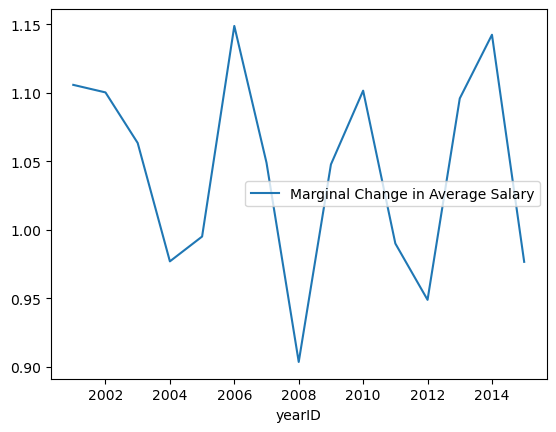

In [2248]:
dfSalaryChange.plot.line( x='yearID', y= 'Marginal Change in Average Salary')

In [2249]:
dfNew = pd.merge(dfNew, dfSalaryChange[['yearID', 'Marginal Change in Average Salary']], on='yearID', how='left')


In [2251]:
dfNew = dfNew.drop(['Games Played', 'Games Started', '-WPA', 'AB', 'H','SO', 'AVG', 'BB%', 'K%', 'OBP', 'SLG', 'OPS', 'wRC', 'Bat', 'Rep', 'Pos', '+WPA', 'WPA/LI', 'BABIP', 'Events'], axis=1)

In [2252]:
dfNew = dfNew.dropna().copy()

In [2253]:
dfNew

,playerID,Name,yearID,teamID,lgID,salary,Age,PA,Singles,Doubles,Triples,HR,R,RBI,BB,IBB,HBP,SF,SH,GDP,SB,CS,BB/K,ISO,wOBA,wRAA,RAR,WAR,Spd,wRC+,WPA,RE24,REW,pLI,PH,Clutch,BsR,Def,wSB,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber,Marginal Change in Average Salary
1,abreubo01,Bobby Abreu,2001,PHI,NL,4983000.0,27.0,704.0,87.0,48.0,4.0,31.0,118.0,110.0,106.0,11.0,1.0,9.0,0.0,13.0,36.0,14.0,0.77,0.253,0.393,39.0,54.0,5.3,6.1,139.0,3.78,42.45,4.33,1.01,3.0,-0.37,1.1,-6.3,1.1,37.2,1.1,0.389,108.0,168.0,113.0,116.0,123.0,148.0,108.0,5.3,3.780691e+06,1.318013,2747444.0,6333333.0,4234.0,308.0,11.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21,1.105738
2,abreubo01,Bobby Abreu,2002,PHI,NL,6333333.0,28.0,685.0,100.0,50.0,6.0,20.0,102.0,85.0,104.0,9.0,3.0,6.0,0.0,11.0,31.0,12.0,0.89,0.213,0.401,42.4,52.0,5.2,6.1,148.0,5.15,43.56,4.67,1.07,3.0,0.73,2.1,-13.1,1.1,42.8,1.4,0.352,116.0,163.0,105.0,122.0,123.0,136.0,119.0,5.2,4.070677e+06,1.555843,3332380.0,9100000.0,4062.0,282.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21,1.100230
3,abreubo01,Bobby Abreu,2003,PHI,NL,9100000.0,29.0,695.0,117.0,35.0,1.0,20.0,99.0,101.0,109.0,13.0,2.0,7.0,0.0,13.0,22.0,9.0,0.87,0.168,0.379,30.1,56.6,5.6,4.3,131.0,3.44,48.46,4.94,0.99,0.0,0.44,0.8,5.2,0.4,28.6,1.3,0.367,112.0,174.0,112.0,120.0,109.0,104.0,117.0,5.6,4.177624e+06,2.178272,5041666.0,10600000.0,4120.0,304.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21,1.063301
4,abreubo01,Bobby Abreu,2004,PHI,NL,10600000.0,30.0,713.0,95.0,47.0,1.0,30.0,118.0,105.0,127.0,10.0,5.0,7.0,0.0,5.0,40.0,5.0,1.09,0.242,0.413,50.2,58.8,5.7,5.6,148.0,5.14,66.60,6.24,1.05,2.0,-1.06,11.2,-20.9,5.6,55.7,1.9,0.383,112.0,197.0,100.0,125.0,124.0,145.0,110.0,5.7,3.952821e+06,2.681629,5109074.0,13100000.0,4184.0,311.0,13.0,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21,0.976861
5,abreubo01,Bobby Abreu,2005,PHI,NL,13100000.0,31.0,719.0,106.0,37.0,1.0,24.0,104.0,102.0,117.0,15.0,6.0,8.0,0.0,7.0,31.0,9.0,0.87,0.189,0.379,31.6,38.3,3.8,4.9,128.0,4.00,51.79,5.27,0.99,1.0,-0.10,4.1,-14.5,2.1,29.4,1.5,0.382,106.0,185.0,116.0,119.0,111.0,119.0,110.0,3.8,4.084125e+06,3.207542,5083750.0,15000000.0,4092.0,266.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21,0.994980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,zobribe01,Ben Zobrist,2011,TBR,AL,4687300.0,30.0,674.0,86.0,46.0,6.0,20.0,99.0,91.0,77.0,1.0,2.0,5.0,2.0,9.0,19.0,6.0,0.60,0.201,0.359,22.7,60.5,6.4,6.2,130.0,1.32,31.26,3.31,0.94,1.0,-0.52,4.4,10.1,0.8,28.1,2.7,0.334,104.0,141.0,106.0,109.0,115.0,133.0,105.0,6.4,5.394907e+06,0.868838,2201783.0,4687300.0,4044.0,278.0,317.0,6.0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,27,0.989894
2633,zobribe01,Ben Zobrist,2012,TBR,AL,4687300.0,31.0,668.0,85.0,39.0,7.0,20.0,88.0,74.0,97.0,7.0,3.0,6.0,2.0,13.0,14.0,9.0,0.94,0.202,0.365,27.0,54.5,5.7,5.3,137.0,2.41,27.08,2.92,1.02,0.0,-0.46,-4.2,7.1,-1.6,24.8,2.9,0.329,105.0,181.0,80.0,118.0,114.0,129.0,101.0,5.7,4.906295e+06,0.955365,3055187.0,5687300.0,4025.0,232.0,252.0,12.0,55.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,27,0.948755
2634,zobribe01,Ben Zobrist,2013,TBR,AL,5687300.0,32.0,698.0,117.0,36.0,3.0,12.0,77.0,71.0,72.0,4.0,7.0,6.0,1.0,18.0,11.0,3.0,0.79,0.127,0.334,11.2,39.0,4.2,4.4,114.0,1.83,9.56,1.08,0.99,1.0,0.72,2.8,2.5,0.4,13.9,2.7,0.251,107.0,127.0,66.0,110.0,99.0,85.0,102.0,4.2,5.258858e+06,1.081471,2941302.0,7000000.0,4130.0,278.0,373.0,5.0,79.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,27,1.095824
2635,zobribe01,Ben Zobrist,2014,TBR,AL,7000000.0,33.0,654.0,108.0,34.0,3.0,10.0,83.0,52.0,75.0,4.0,1.0,6.0,2.0,8.0,10.0,5.0,0.89,0.123,0.333,11.6,42.8,4.7,4.4,117.0,0.83,8.33,0.94,1.00,2.0,-0.72,2.2,8.0,-0.6,14.2,2.1,0.258,107.0,149.0,65.0,112.0,101.0,89

C:\Users\Evan\AppData\Local\Temp\ipykernel_27380\3481202483.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dfNew.corr(), dtype=bool))
C:\Users\Evan\AppData\Local\Temp\ipykernel_27380\3481202483.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfNew.corr(), annot = True, mask=mask, vmin=-1, vmax=1)


<Axes: >

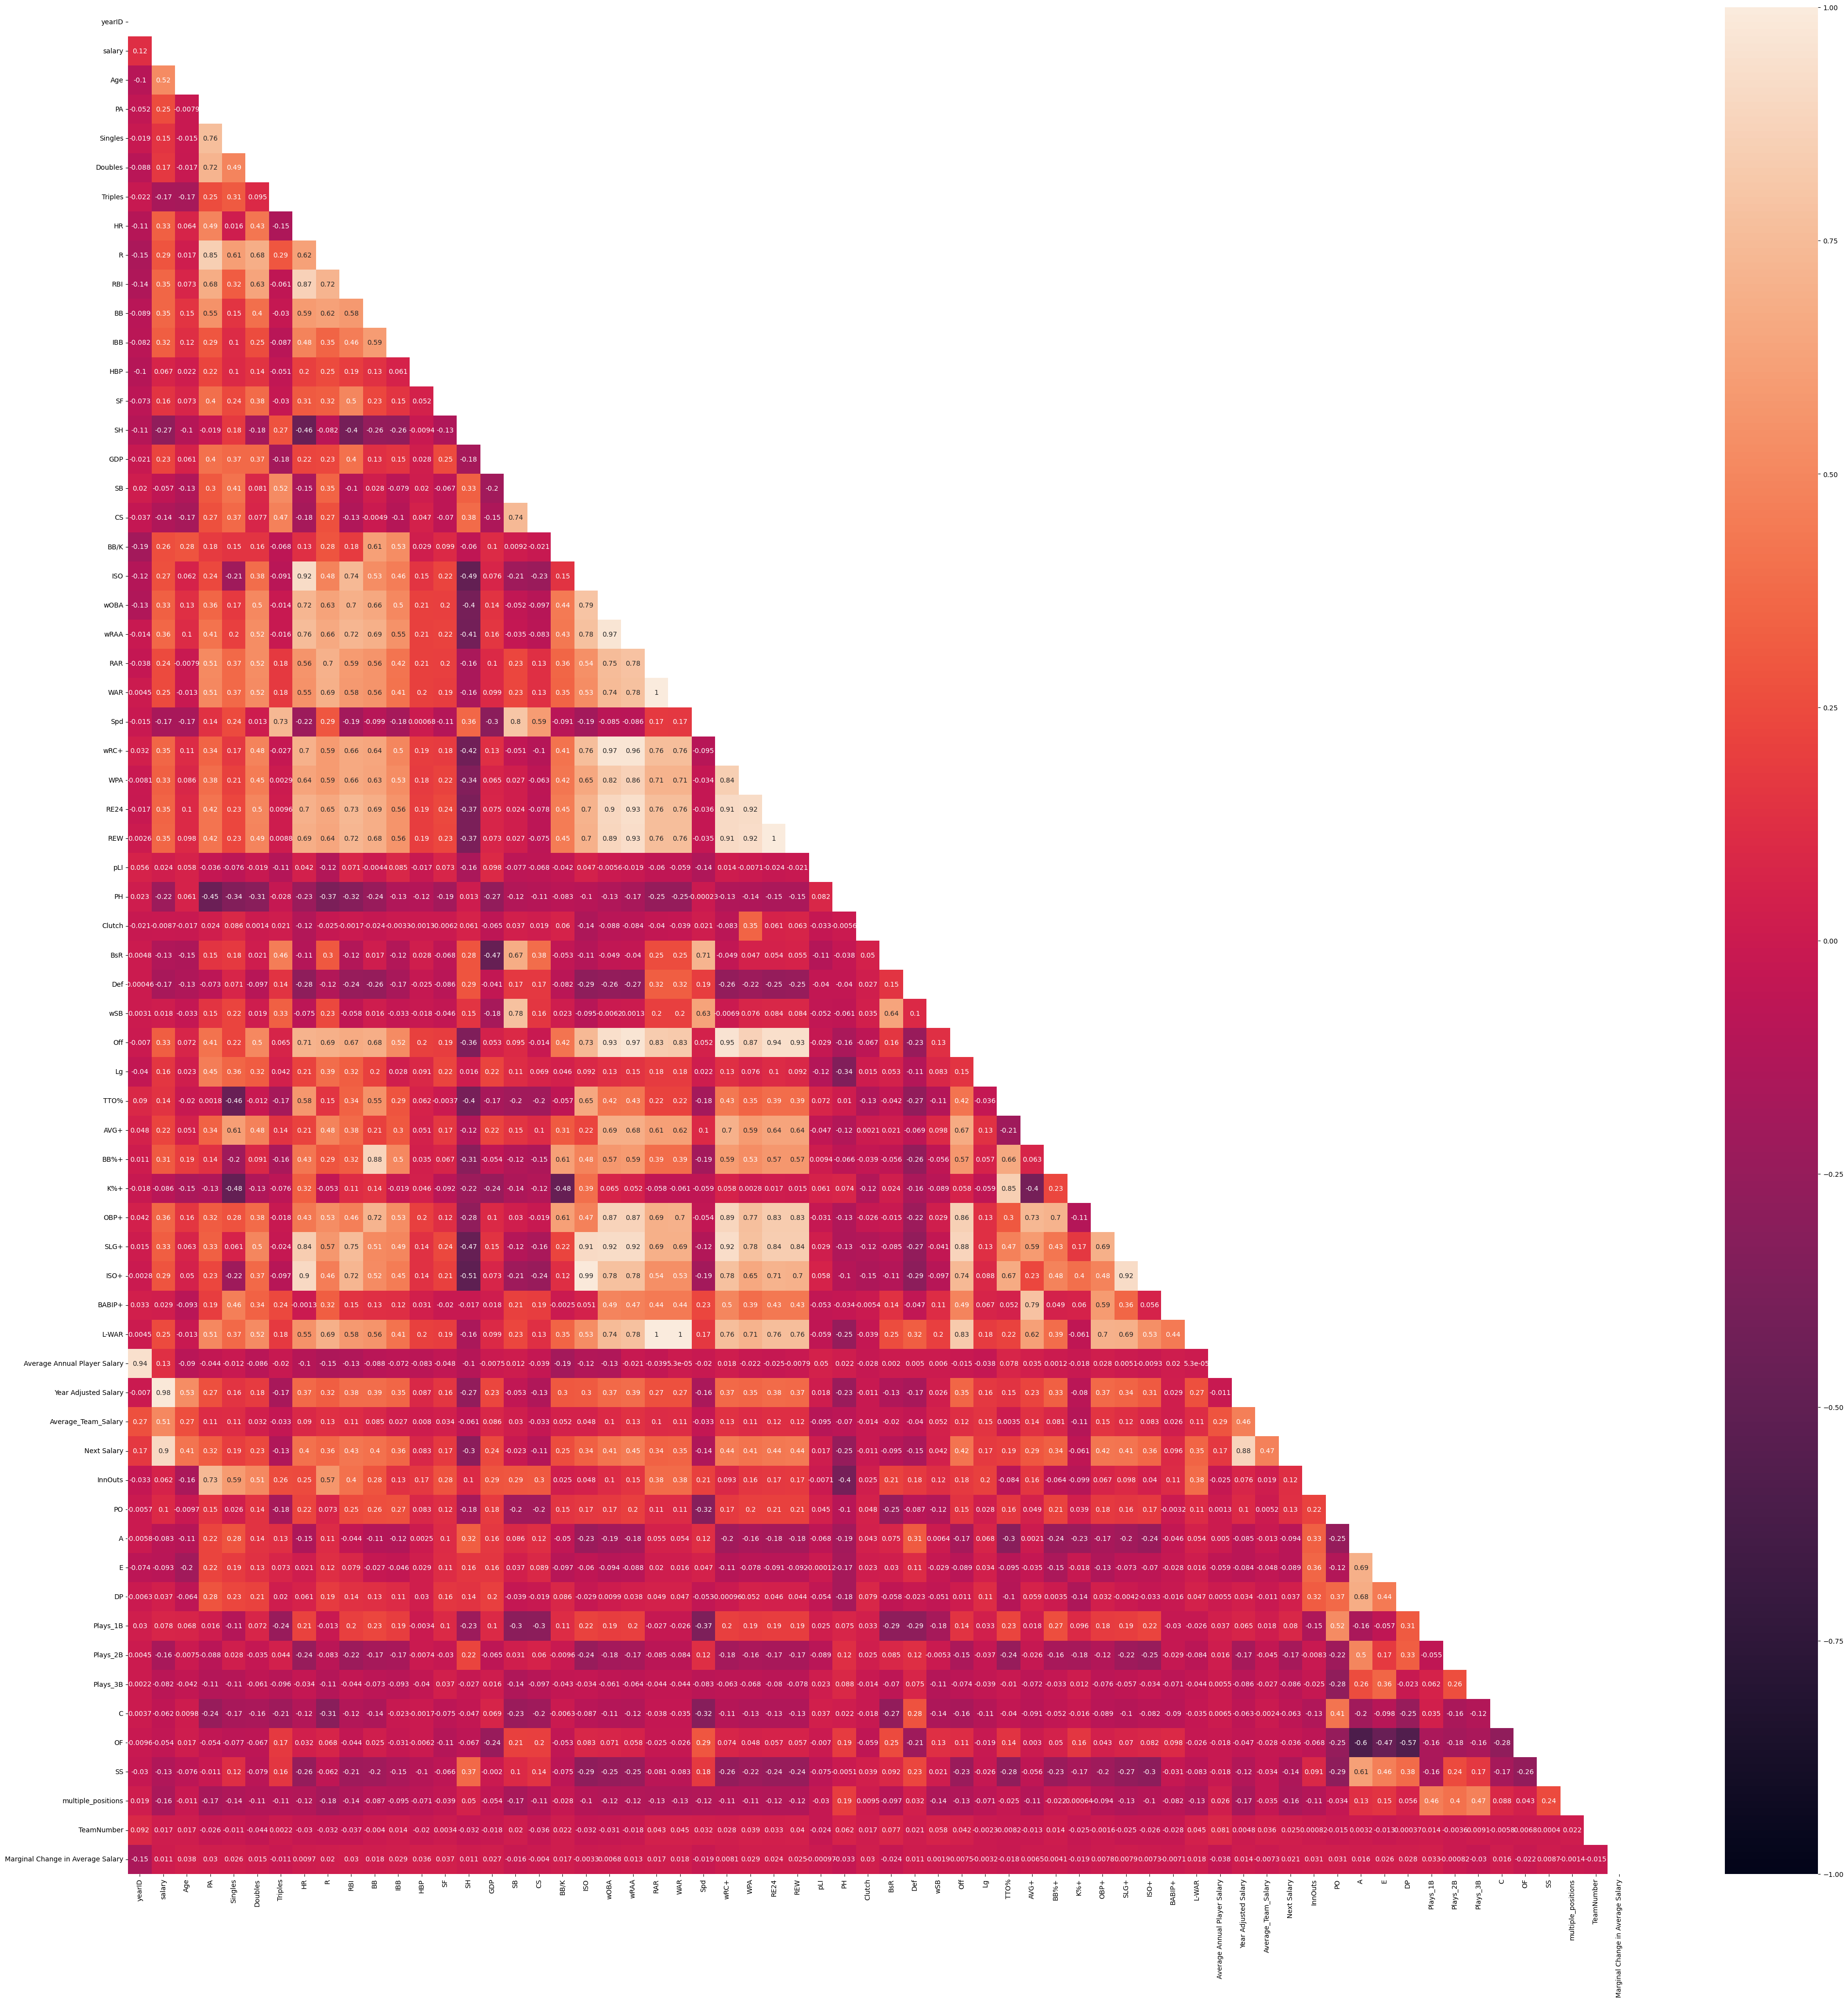

In [2254]:
import matplotlib.pyplot as plt

plt.figure(figsize = (50, 50))
mask = np.triu(np.ones_like(dfNew.corr(), dtype=bool))
sns.heatmap(dfNew.corr(), annot = True, mask=mask, vmin=-1, vmax=1)
# Throughout my studying, it appears that multi-collinearity has little to no impact on predictive modeling, which means I should not worry 

In [2255]:
variables = 0

In [2372]:
#I learned about Series Selectors, we have to make a feature selector, but first I found that creating a ridge regression model is helpful!
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit 
Reg = Ridge(alpha=5) # The alpha value, depending on what you set it as, can reduce over-fitting 
#The Model must not take int oaccount the future, the year must be taken into account so that it isn't using future years to predict previous salaries

split_data = TimeSeriesSplit(n_splits=3) 
sfs = SequentialFeatureSelector(Reg, n_features_to_select= 15, direction='forward', cv=split_data, n_jobs= 6)

In [2373]:
remove= ['playerID' , 'Name', 'teamID', 'lgID', 'Next Salary', ]
use = dfNew.columns[~dfNew.columns.isin(remove)]

In [2374]:
dfNew.describe()

,yearID,salary,Age,PA,Singles,Doubles,Triples,HR,R,RBI,BB,IBB,HBP,SF,SH,GDP,SB,CS,BB/K,ISO,wOBA,wRAA,RAR,WAR,Spd,wRC+,WPA,RE24,REW,pLI,PH,Clutch,BsR,Def,wSB,Off,Lg,TTO%,AVG+,BB%+,K%+,OBP+,SLG+,ISO+,BABIP+,L-WAR,Average Annual Player Salary,Year Adjusted Salary,Average_Team_Salary,Next Salary,InnOuts,PO,A,E,DP,Plays_1B,Plays_2B,Plays_3B,C,OF,SS,multiple_positions,TeamNumber,Marginal Change in Average Salary,player_season,Salary_correlation,Salary_difference,Salary Season
count,2464.000000,2.464000e+03,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2.464000e+03,2464.000000,2.464000e+03,2.464000e+03,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.00000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000,2464.000000
mean,2007.878653,4.902615e+06,28.737013,551.841315,88.135146,27.441964,2.774756,17.213474,70.824675,68.080763,49.595779,4.519886,5.319399,4.211851,2.181412,11.361607,9.340503,3.504464,0.589188,0.170603,0.341857,9.702476,25.711404,2.610836,4.081453,109.114448,0.874781,10.787106,1.093608,1.006700,5.702922,-0.087127,0.252719,-0.022930,0.113068,7.598864,1.504545,0.284229,103.725649,104.883523,94.204140,103.572240,105.801948,109.343750,101.694805,2.610836,4.787713e+06,1.025762,4.825233e+06,5.891453e+06,3190.302354,382.378653,140.920049,7.686688,37.955357,0.270292,0.189935,0.202516,0.11526,0.454140,0.193588,0.272321,15.127029,1.042788,2.408279,0.879950,1.729162,1.000000
std,4.334975,5.324689e+06,3.722270,114.161034,25.663236,9.189565,2.698249,10.645769,22.796495,26.036148,23.022023,5.756919,4.249699,2.467278,3.261502,5.440514,10.927274,3.295930,0.300491,0.060295,0.038711,18.436706,20.709073,2.094757,1.721699,25.349171,2.034622,20.491283,2.069535,0.056636,7.365592,0.888352,3.741623,11.289128,1.470177,18.280193,0.773938,0.078448,10.742748,39.109254,29.940598,10.831136,16.995657,38.021714,10.439247,2.094757,7.222877e+05,1.094566,2.575496e+06,5.560906e+06,826.315742,327.501188,154.542279,5.735124,41.714266,0.444201,0.392329,0.401956,0.31940,0.497993,0.395190,0.445245,8.836799,0.071828,2.442956,0.340112,1.822382,1.066347
min,2001.000000,2.020000e+05,20.000000,300.000000,25.000000,5.000000,0.000000,0.000000,21.000000,14.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.033000,0.239000,-38.000000,-33.700000,-3.400000,0.400000,37.000000,-6.860000,-56.240000,-5.360000,0.790000,0.000000,-3.830000,-12.600000,-60.400000,-4.100000,-43.600000,0.200000,0.096000,62.000000,20.000000,25.000000,73.000000,63.000000,21.000000,66.000000,-3.400000,3.780691e+06,0.049623,3.578570e+05,2.850000e+05,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.903423,0.000000,-1.000000,0.035714,0.049052
25%,2004.000000,5.100750e+05,26.000000,465.750000,69.000000,20.000000,1.000000,9.000000,53.000000,48.000000,33.000000,1.000000,2.000000,2.000000,0.000000,7.000000,2.000000,1.000000,0.400000,0.126000,0.315000,-3.000000,11.100000,1.100000,2.700000,92.000000,-0.530000,-3.530000,-0.360000,0.970000,1.000000,-0.670000,-2.000000,-8.000000,-0.700000,-4.925000,0.900000,0.226750,96.000000,77.000000,73.000000,96.000000,94.000000,81.000000,95.000000,1.100000,4.084125e+06,0.099949,3.014642e+06,1.500000e+06,2705.000000,177.750000,8.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,0.976861,0.000000,0.920528,1.000000,0.097577
50%,2008.000000,3.050000e+06,28.000

In [2375]:
#This function wwill give us the best features for the model

sfs.fit(dfNew[use], dfNew['Next Salary'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=5), n_features_to_select=15,
                          n_jobs=6)

In [2376]:
sfs.get_support()

array([False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True])

In [2377]:
variables = list(use[sfs.get_support()])

In [2378]:
variables

['salary',
 'Age',
 'Singles',
 'BB',
 'SH',
 'BB/K',
 'WAR',
 'PH',
 'SLG+',
 'Average_Team_Salary',
 'A',
 'SS',
 'player_season',
 'Salary_difference',
 'Salary Season']

In [2379]:
#backtest generates the predictions. It will 
def backtest(data, model, variables, start=5, step=1):
    all_predictions = []
    years = sorted(data['yearID'].unique())
    
    for i in range (start, len(years), step): 
        current_year = years[i]
        
        train = data[data['yearID'] < current_year]
        test = data[data['yearID'] == current_year]
        
        model.fit(train[variables], train['Next Salary'])
        
        preds = model.predict(test[variables])
        preds= pd.Series(preds, index=test.index)
        combined = pd.concat([test['Next Salary'], preds], axis=1)
        combined.columns = ['actual', 'prediction'] 
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)   

In [2380]:
predictions = backtest(dfNew, Reg, variables)

In [2381]:
predictions

,actual,prediction
31,7500000.0,5.501305e+06
63,400000.0,3.219731e+06
71,3500000.0,2.369807e+06
95,700000.0,3.034334e+06
102,405000.0,-1.438480e+05
...,...,...
2503,10550000.0,8.438430e+06
2527,21733615.0,1.988814e+07
2576,1250000.0,1.720955e+06
2588,1000000.0,2.578523e+06


In [2382]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predictions['actual'], predictions['prediction'])
                   

5487311411159.936

In [2383]:
5503537180318.431**.05

4.3354291690101086

In [2384]:
dfNew['Next Salary'].describe()

count    2.464000e+03
mean     5.891453e+06
std      5.560906e+06
min      2.850000e+05
25%      1.500000e+06
50%      4.000000e+06
75%      8.500000e+06
max      3.300000e+07
Name: Next Salary, dtype: float64

In [ ]:
def player_history(df):
    df= df.sort_values('yearID')
    
    df['player_season'] = range (0, df.shape[0])
    df['Salary_correlation'] = list(df[['player_season', 'salary']].expanding().corr().loc[(slice(None), 'player_season'), 'salary'])
    df['Salary_correlation'].fillna(1, inplace=True)
    
    df['Salary_difference'] = df['salary'] / df['salary'].shift(1)
    df['Salary_difference'].fillna(1, inplace=True)
    
    df['Salary_difference'][df['Salary_difference'] == np.inf] = 1
    
    return df

dfNew = dfNew.groupby('playerID', group_keys=False).apply(player_history)

In [ ]:
def group_averages(df): 
    return df['salary'] / df['salary'].mean()

In [ ]:
dfNew

In [ ]:
dfNew['Salary Season'] = dfNew.groupby('yearID', group_keys=False).apply(group_averages)

dfNew.duplicated().sum()

In [ ]:
def clean_dataset(df):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df = df.select_dtypes(include=[np.number])
    df.dropna(inplace=True)
    return df.astype(np.float64)

In [ ]:
cleaned_df = clean_dataset(dfNew)



In [ ]:
cleaned_df

In [ ]:
new_variables = variables + ['player_season', 'Salary_correlation', 'Salary Season', 'Salary_difference']


In [ ]:
predictions = backtest(cleaned_df, Reg, new_variables) 

In [ ]:
predictions

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predictions['actual'], predictions['prediction'])
                   

In [ ]:

5471674796800.4123**.05

In [ ]:
#The second model is even worse, this suggest model mispecification, despite how much I've tried to fine tune the selection process and create new calculate fields, it appears that there just may not be the right kind or amount of data to adequetely predict salary 


import seaborn as sns

sns.distplot(dfNew['salary'])


In [ ]:
import pandas as pd

pd.Series(Reg.coef_, index=new_variables).sort_values()

In [ ]:
#Final Thoughts
# I think there is a lot more I can soon do with this model.
# The biggest issue I had was data collection. I wanted to use Statcast data, but the issue is there isn't openly (free) data available on player salaries for the entirel league after 2016. I could scrape that together however. I think statcast data and sabermetrics in general would be a far better predictor of salary, especially if you make each year a player plays his rolling average instead of his individual year-specific stats.
#The model uses year before data to predict, and the mean_squared_error  shows how bad it is when it comes to accurately predicting data. This is probably because the relationship between a players specific batting performance and salary is indeed non-linear. 
# There is a lot more observations and similar stats for players with lower salaries, I think the model does better in predicting players with lower salaries due to that. The issue comes when a player starts to have better seasons, they will be expected to earn more money. A model taking into account of rolling performance averages would fare better
# I also think that there is skewness here, albeit probably not that much, with players locked in bad contracts. Most of the time the players with the higher salaries are on long-term deals where they are garunteed money, meaning their salary is not reactive to their performance, which means that the model can only say how much this players performance is actually worth relative to everyone else. 
#The nature of long-term, garunteed contracts in baseball creates a lot of barriers in accurately predicting salaries, but I learned a lot using this data. 
# In conclusion I think in a year or two I will revisit this to see if I can update it with statcast data to include more advanced statistics and hope that salary data becomes more available.
# With advanced scouting and the continued used of advanced metrics, I predict that the traditional stats such as these are more so on their way out in terms of having weight on how much to pay a player
# There are , in my opinion, statistics that are far better in judging a player's performance than the ones pybaseball can provide for the given time span. After 2016 the data becomes more consistent and available for everyone, but salary does not. 


In [ ]:
import matplotlib as plt

In [ ]:
dfNew.plot.scatter(y= 'salary',x = 'Average_Team_Salary', title ='The relationship between player salary and a teams average salary')